# Clase 7 - Frequency analysis, Upsampling & Downsampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def DFT(t,signal):          #Ingresar señal continua y su tiempo
    Wmax = 2 * np.pi * 100;K = 500;k = np.arange(K+1)
    W = k * Wmax / K

    exp_term = np.exp(-1j * np.outer(t, W))
    Xa = signal @ exp_term * (1/len(t))
    Xa = np.abs(Xa)

    #Shift de la transformada y dominio w
    W = np.concatenate((-np.flip(W), W[1:]))
    Xa = np.concatenate((np.flip(Xa), Xa[1:]))

    return Xa, W

def Modulacion(t,signal):
    s = np.zeros((len(t),))
    s[::100] = np.double(1.0)
    xs = signal * s

    Xs,W = DFT(t,xs)

    return Xs, W, xs          #Señal modulada y su dominio frecuencia

#5. Ploteo con subplots (para filtro, ventana y filtro*ventana)
def subplots(subplot, n, h, titulo): #h=filtro, wind=ventana, new_h =filtro*ventana
    plt.subplot(subplot)
    plt.stem(n, h, "b")
    plt.xlabel("Samples (n)")
    plt.title(titulo)
    plt.grid(True)

#6. Ploteo con subplots (para FIR)
def subplots_FIR(subplot, w, H):
    plt.subplot(subplot)
    plt.stem(w / np.pi, np.abs(H), "r")
    plt.xlabel("Frequency in pi units")
    plt.title("FIR filter frequency response")
    plt.grid(True)

'\n\\omega = Radianes / s - en señal continua \nw = Radianes unicamente - en señal discreta\n'

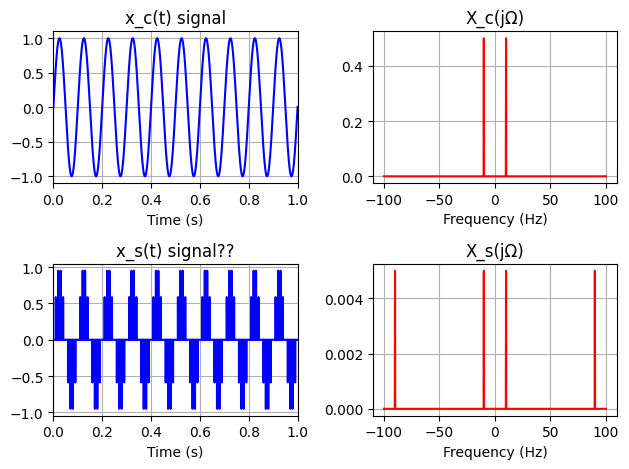

In [2]:
#1.Procedimiento para discretizar una señal continua
'''
1°  Modulación con el tren de impulso ( hallar xs(t) )
2°  Obtenemos x[n] con un dominio discreto
3°  Normalización de frecuencia en el espectro (w = \omega*T = \omega /Fs)
4°  Efectos de la normalización ( w = 2pi, omega = omega_s)
'''
##Función Modulacion
t = np.arange(0, 5, 0.0001) #vector tiempo
xc = np.sin(2 * np.pi * 10 * t) #señal 
Xc,Wc = DFT(t,xc)
Xs,Ws,xs = Modulacion(t,xc)

plt.subplot(221)
plt.plot(t, xc, 'b')
plt.xlabel('Time (s)')
plt.title('x_c(t) signal')
plt.xlim([0, 1])
plt.grid(True)

plt.subplot(222)
plt.plot(Wc/(2*np.pi), Xc, 'r')
plt.xlabel('Frequency (Hz)')
plt.title('X_c(jΩ)')
plt.grid(True)

plt.subplot(223)
plt.plot(t, xs, 'b')
plt.xlabel('Time (s)')
plt.title('x_s(t) signal??')
plt.xlim([0, 1])
plt.grid(True)

plt.subplot(224)
plt.plot(Ws/(2*np.pi), Xs, 'r')
plt.xlabel('Frequency (Hz)')
plt.title('X_s(jΩ)')
plt.grid(True)

plt.tight_layout()

'''
\omega = Radianes / s - en señal continua 
w = Radianes unicamente - en señal discreta
'''

In [3]:
#2 Nyquist : Fs >= 2*Omega_max (para evitar aliasing)  'Aliasing = mala separación entre los impulsos'
'Para devolver una señal discreta a continua se convoluciona con un filtro'
'Filtro ideal = sinc'

# Define time vector
t = np.arange(0, 5, 0.01)

# Generate aliased signal
nT = np.arange(0, 5, 0.01)
n = nT / 0.01

#-----------------Señal con aliasing--------------------#
xs1 = np.sin(2 * np.pi * 10 / 100 * n) + 2 * np.sin(2 * np.pi * 70 / 100 * n)

# Reconstruct aliased signal
y1 = np.zeros_like(t)
for i in range(len(t)):
    for j in range(len(n)):
        y1[i] += xs1[j] * np.sinc((t[i] - nT[j]) / 0.01)

#-----------------Señal sin aliasing--------------------#
xs2 = np.sin(2 * np.pi * 10 / 100 * n)

# Reconstruct non-aliased signal
y2 = np.zeros_like(t)
for i in range(len(t)):
    for j in range(len(n)):
        y2[i] += xs2[j] * np.sinc((t[i] - nT[j]) / 0.01)


## ¿Cómo relacionar la señal discreta con la señal continua?
Procesamiento en tiempo discreto:

![](https://github.com/piero-latorre/DSP/blob/main/VII/image_6.png?raw=true)


In [4]:
#3 Upsampling & Downsampling
'''Este procedimiento consiste en cambiar el fs de un señal con operaciones de tiempo discreto.
    Downsampling : Reducir fs por un factor D
    Upsampling   : Incrementar fs por un factor I
'''

## Downsampling de 100 Hz a 50 Hz
fs = 100;ts = 1/fs;                                                                         #Fs inicial de la señal
nT = np.arange(0, 1, ts)                                                                    #El sampleo se pone como steps
x = np.sin(2*np.pi*10*nT)
nx = np.arange(0, len(nT))                                                                  #Dominio de la señal : [0,100]

D = 2
x_down = x[::D]             #<-------------------------------Downsampleo : poner un step en la señal 
nx_down = np.arange(0, len(x_down))                                                         #Dominio de la nueva señal : [0,50]

## Transforamadas DFT de las señales
X = np.fft.fftshift(np.fft.fft(x))
w=2*np.pi*nx/len(nx)               ;     w=np.fft.fftshift(w)         ;       w=np.unwrap(w-2*np.pi)

X_down = np.fft.fftshift(np.fft.fft(x_down))
w_down=2*np.pi*nx_down/len(nx_down);    w_down=np.fft.fftshift(w_down);     w_down=np.unwrap(w_down-2*np.pi)

'''
------------------------------------------------------------------------------------------------------------------------
DECIMACIÓN : FILTRAR LA SEÑAL(1°) y HACERLE DOWNSAMPLING(2°)
    Usar función : decimate
'''

from scipy.fft import fftshift, fft
from scipy.signal import decimate
# Generate the signal
fs = 100;ts = 1/fs;nT = np.arange(0, 1, ts)
nx = np.arange(len(nT))
x = np.sin(2*np.pi*40*nT)

# Apply decimation
D = 2
x_down =decimate(x,D)                           #<----------------------
nx_down = np.arange(len(x_down))



In [5]:
## Upsampling de 100 Hz a 200 Hz
fs = 100
ts = 1/fs
nT = np.arange(0, 1, ts)
nx = np.arange(0, len(nT))
x = np.sin(2*np.pi*10*nT)                           #Señal

I = 2                           #<---------------------------
x_up = np.zeros(I*len(x))       #Creó una vector de ceros
x_up[::I] = x                   #Cada dos pasos (I) coloca un valor de la señal
nx_up = np.arange(0, len(x_up))

#Transformada de las señales
X = np.fft.fftshift(np.fft.fft(x))
X_up = np.fft.fftshift(np.fft.fft(x_up))
w = np.fft.fftshift(np.linspace(-np.pi, np.pi, len(nx)))
w_up = np.fft.fftshift(np.linspace(-np.pi, np.pi, len(nx_up)))

'''
------------------------------------------------------------------------------------------------------------------------
Interpolación : HACER EL UPSAMPLING (1°) y FILTRAR (2°)
usar función : np.interp'''

import numpy as np
import matplotlib.pyplot as plt

# Define signal
fs = 100
ts = 1/fs
nT = np.arange(0, 1, ts)
nx = np.arange(len(nT))
x = np.sin(2*np.pi*10*nT)

# Interpolate signal
I = 2
x_up = np.interp(np.arange(0, len(x), 1/I), np.arange(0, len(x),1), x)      #<--------------------- 
nx_up = np.arange(len(x_up))


## Cambiar el Fs por un factor racional

In [6]:
'''Procedimiento : Hacer una interpolación y luego una decimación (en ese orden para temas prácticos)
    --> Fy = (I/D) * Fx
    --> Ty = (D/I) * Tx

    El filtro de la decimación se puede juntar con el de la decimación

'''

'Procedimiento : Hacer una interpolación y luego una decimación (en ese orden para temas prácticos)\n    --> Fy = (I/D) * Fx\n    --> Ty = (D/I) * Tx\n\n    El filtro de la decimación se puede juntar con el de la decimación\n\n'

$$H(e^{\omega})=\begin{cases}I,\quad|\omega|\leq\min\left\{\frac{\pi}{D};\frac{\pi}{I}\right\} \\ 0,\quad \text{otherwise}\end{cases}$$
![](https://github.com/piero-latorre/DSP/blob/main/VII/image_11.png?raw=true)
![](https://github.com/piero-latorre/DSP/blob/main/VII/image_12.png?raw=true)


In [7]:
'''Si se trata de valores grandes, se pueden dividir estos en sus factores y hacer un sistema multietapas '''

'Si se trata de valores grandes, se pueden dividir estos en sus factores y hacer un sistema multietapas '

$$T_y=\frac{\prod_{i=0}^N D_i}{\prod_{j=0}^M I_j}T_x$$

$T_y=\frac{63}{130} T_x$, Dividimos I y D en sus factores:

* $D_0=7,D_1=3, D_2=3$

* $I_0 =13,I_1=5, I_2=2 $

![](https://github.com/piero-latorre/DSP/blob/main/VII/image_13.png?raw=true)
![](https://github.com/piero-latorre/DSP/blob/main/VII/image_14.png?raw=true)

# Clase 8 - Diseño de filtros (FIR)

In [8]:
''' The coefficientes of causal filters (FIR or IIR) use the required frequency or frequencies of interest.'''
''' Ningun filtro FIR o IIR son ideales 
    FIR - tienen respuesta impulsiva finita

    *Los coeficientes del filtro son los que caracterizan a este*

    w[n] es una ventana, así lo busco? está en tabla? convolucionar no es lo mismo que multiplicar?
    El ventaneo se le aplica al filtro o a una señal?

    Decibelios : 20 log8 (M que quiero /Mreferencia)
 '''


' Ningun filtro FIR o IIR son ideales \n    FIR - tienen respuesta impulsiva finita\n\n    *Los coeficientes del filtro son los que caracterizan a este*\n\n    w[n] es una ventana, así lo busco? está en tabla? convolucionar no es lo mismo que multiplicar?\n    El ventaneo se le aplica al filtro o a una señal?\n\n    Decibelios : 20 log8 (M que quiero /Mreferencia)\n '

C:\Users\Sofia\AppData\Local\Temp\ipykernel_22408\4254720904.py:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, h, linefmt='b-', markerfmt='bo', basefmt=' ', use_line_collection=True)
C:\Users\Sofia\AppData\Local\Temp\ipykernel_22408\4254720904.py:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(w/np.pi, np.abs(H), linefmt='r-', markerfmt='ro', basefmt=' ', use_line_collection=True)


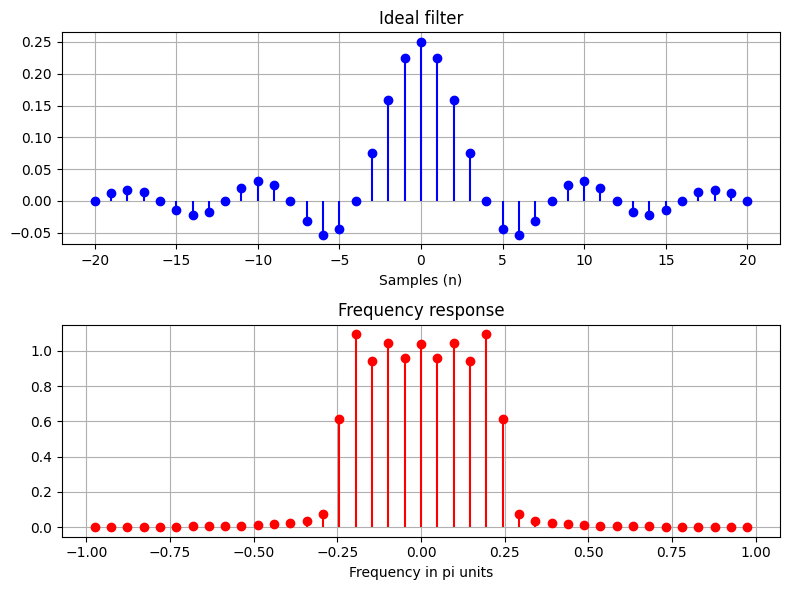

In [9]:
#Filtros Ideales
'''
No se pueden hacer, porque no son causales.
'''
#Ejem: Sinc
import numpy as np
import matplotlib.pyplot as plt

#FILTRO SINC
#señal en el tiempo
n = np.arange(-20, 21)
h = 0.25 * np.sinc(0.25 * n)        #frecuencia en radianes

#Transformada
H = np.fft.fftshift(np.fft.fft(h))
w = 2 * np.pi * np.arange(len(H)) / len(H)
w = np.fft.fftshift(w)
w = np.unwrap(w - 2 * np.pi)

plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.stem(n, h, linefmt='b-', markerfmt='bo', basefmt=' ', use_line_collection=True)
plt.xlabel('Samples (n)')
plt.title('Ideal filter')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(w/np.pi, np.abs(H), linefmt='r-', markerfmt='ro', basefmt=' ', use_line_collection=True)
plt.xlabel('Frequency in pi units')
plt.title('Frequency response')
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
'''
Pasabanda (passband) : rango de frecuencias que no afectaran a los componenetes de la señal
            de entrada.
        * Ancho de banda : es el tamaño del rango de frecuencias.

Frecuencia de paso (wp - pass frequency) : rango de frecuencias que no permite que la señal pase.

Frecuencia de pare (ws - stop frequency) : La banda de transición (transition band) es el rango de frecuencias entre
banda de pase y la banda de pare.

Representación del rango dinámico del filtro : escala logarítmica 20 * log 10 (|H(e)|)

'''

'\nPasabanda (passband) : rango de frecuencias que no afectaran a los componenetes de la señal\n            de entrada.\n        * Ancho de banda : es el tamaño del rango de frecuencias.\n\nFrecuencia de paso (wp - pass frequency) : rango de frecuencias que no permite que la señal pase.\n\nFrecuencia de pare (ws - stop frequency) : La banda de transición (transition band) es el rango de frecuencias entre\nbanda de pase y la banda de pare.\n\nRepresentación del rango dinámico del filtro : escala logarítmica 20 * log 10 (|H(e)|)\n\n'

![imagen2](https://github.com/piero-latorre/DSP/blob/main/VIII/image_1.png?raw=true)


### Diseño de un filtro FIR (no tiene recursividad)
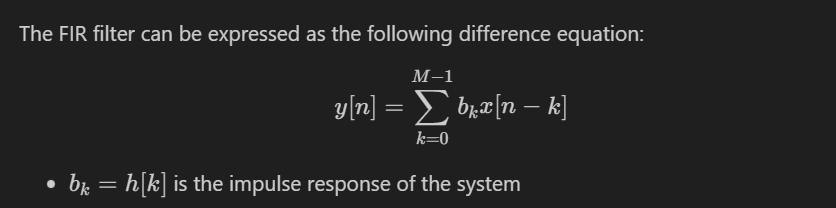

* The frequency response can be expressed as:

$$H(z)=\sum_{k=0}^{M-1}h[k]z^{-k}$$

El diseño de un filtro FIR se basa en encontrar los M coeficientes de h[n] para las características deseadas de nuestro filtro.

2 METODOS QUE SE VERÁN EN CLASES:
* window method - ventanado
* Frequency sampling method

# Ventanado - window method
* Básicamente si tenemos un filtro deseado que tiene una respuesta Hd, y una secuencia hd de duración **infinita** que debemos limitar a *M* coefficients.

La primera aproximación será multiplicar la señal hd por una ventana rectangular

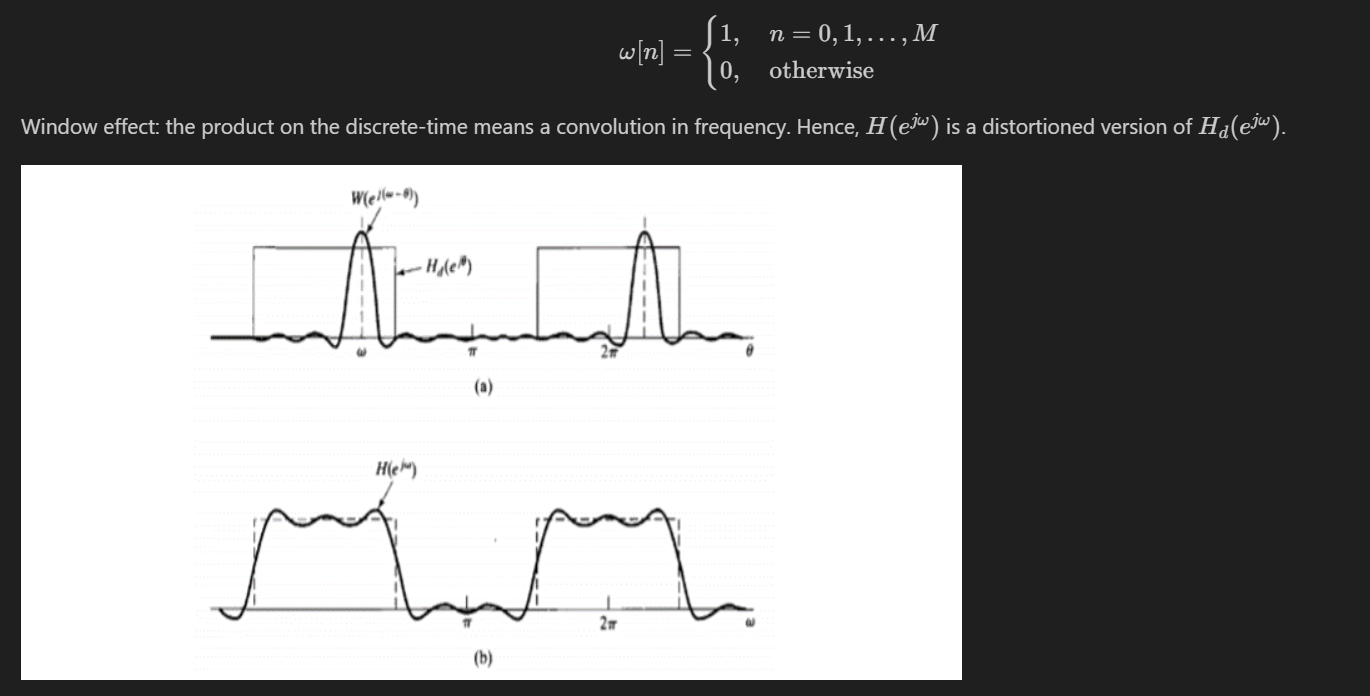

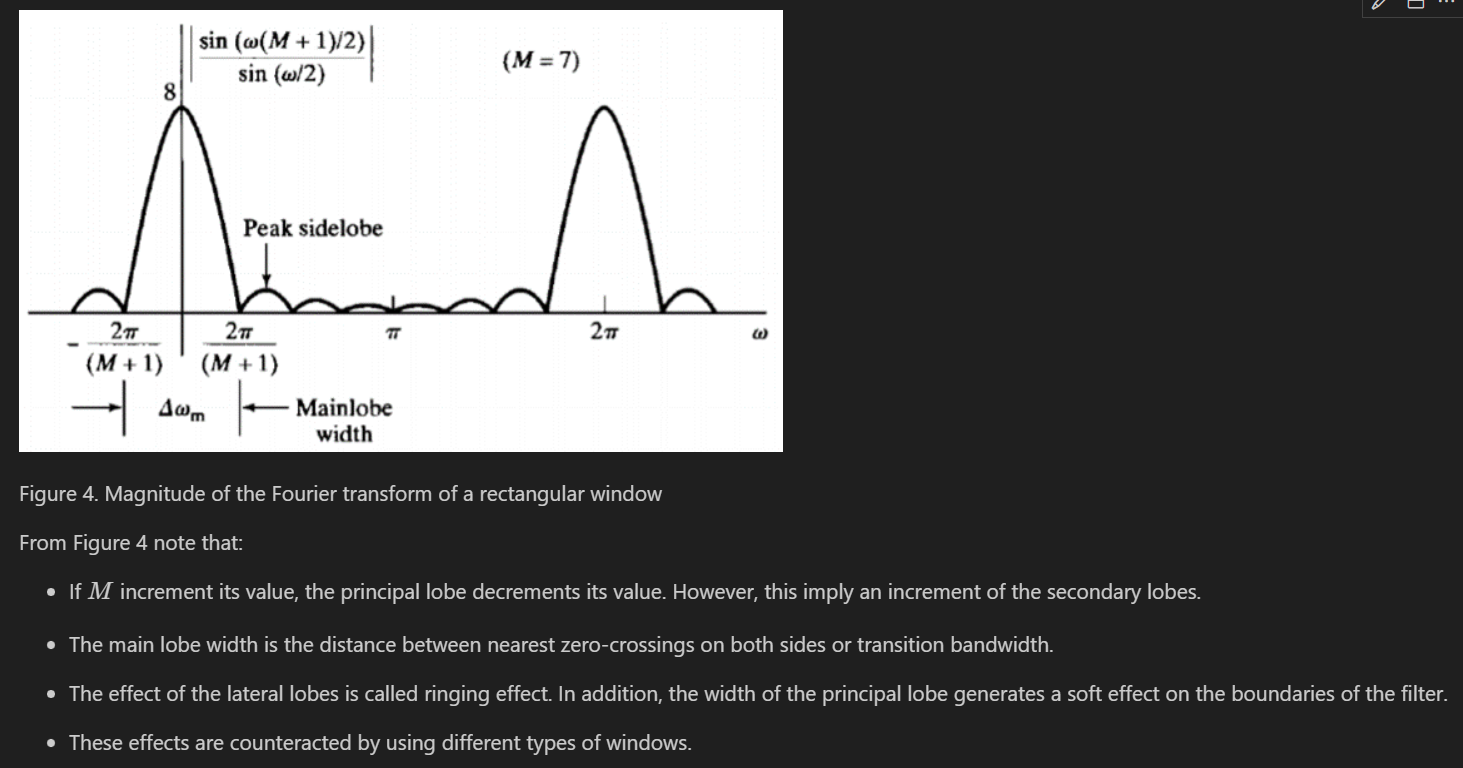





**Rectangular**

$$w[n]=\begin{cases}1,\quad0\leq n\leq M \\ 0,\quad \text{otherwise}\end{cases}$$

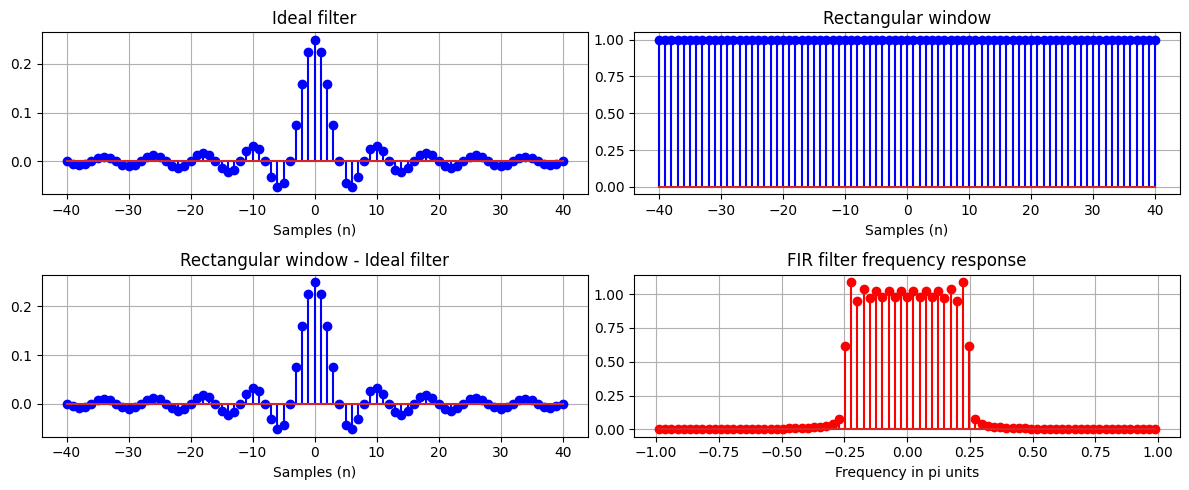

In [11]:
###  Ventanas:
#Rectangular - 
import scipy.signal as sig

#Filtro deseado (Imaginamos que es infinito)
n = np.arange(-40, 41)
h = 0.25*np.sinc(0.25*n)

# Ventana Rectangular 
M = 81
wind = sig.windows.boxcar(M)           #<----- comando para hacer la ventana de amplitud 1, M es el numero de puntos que tendra

#nueva señal en el tiempo, filtro enventanado
h_new = h*wind

# Respuesta en frecuencia del filtro
H = np.fft.fftshift(np.fft.fft(h_new))
w = np.fft.fftshift(2*np.pi*np.arange(len(H))/len(H))
w = np.unwrap(w - 2*np.pi)

# Plot the results
'''
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.stem(n, h, 'b')     #Filtro deseado
plt.xlabel('Samples (n)')
plt.title('Ideal filter')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(n, wind, 'b')  #Ventana rectangular
plt.xlabel('Samples (n)')
plt.title('Rectangular window')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.stem(n, h_new, 'r') #Nuevo filtro con ventana
plt.xlabel('Samples (n)')
plt.title('Rectangular window - Ideal filter')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(w/np.pi, abs(H), 'r')  #Respuesta en frecuencia del nuevo
plt.xlabel('Frequency in pi units')
plt.title('FIR filter frequency response')
plt.grid(True)

# plt.tight()
plt.tight_layout()
'''
plt.figure(figsize=(12,5))
subplots(221, n, h, 'Ideal filter')
subplots(222, n, wind, 'Rectangular window')
subplots(223, n, h_new, 'Rectangular window - Ideal filter')
subplots_FIR(224, w, H)
plt.tight_layout()


**Bartlett (triangular)**

$$w[n]=\begin{cases} 2n/M,\quad 0\leq n\leq M/2 \\ 2-2n/M,\quad M/2<n\leq M\\ 0,\quad \text{otherwise} \end{cases}$$


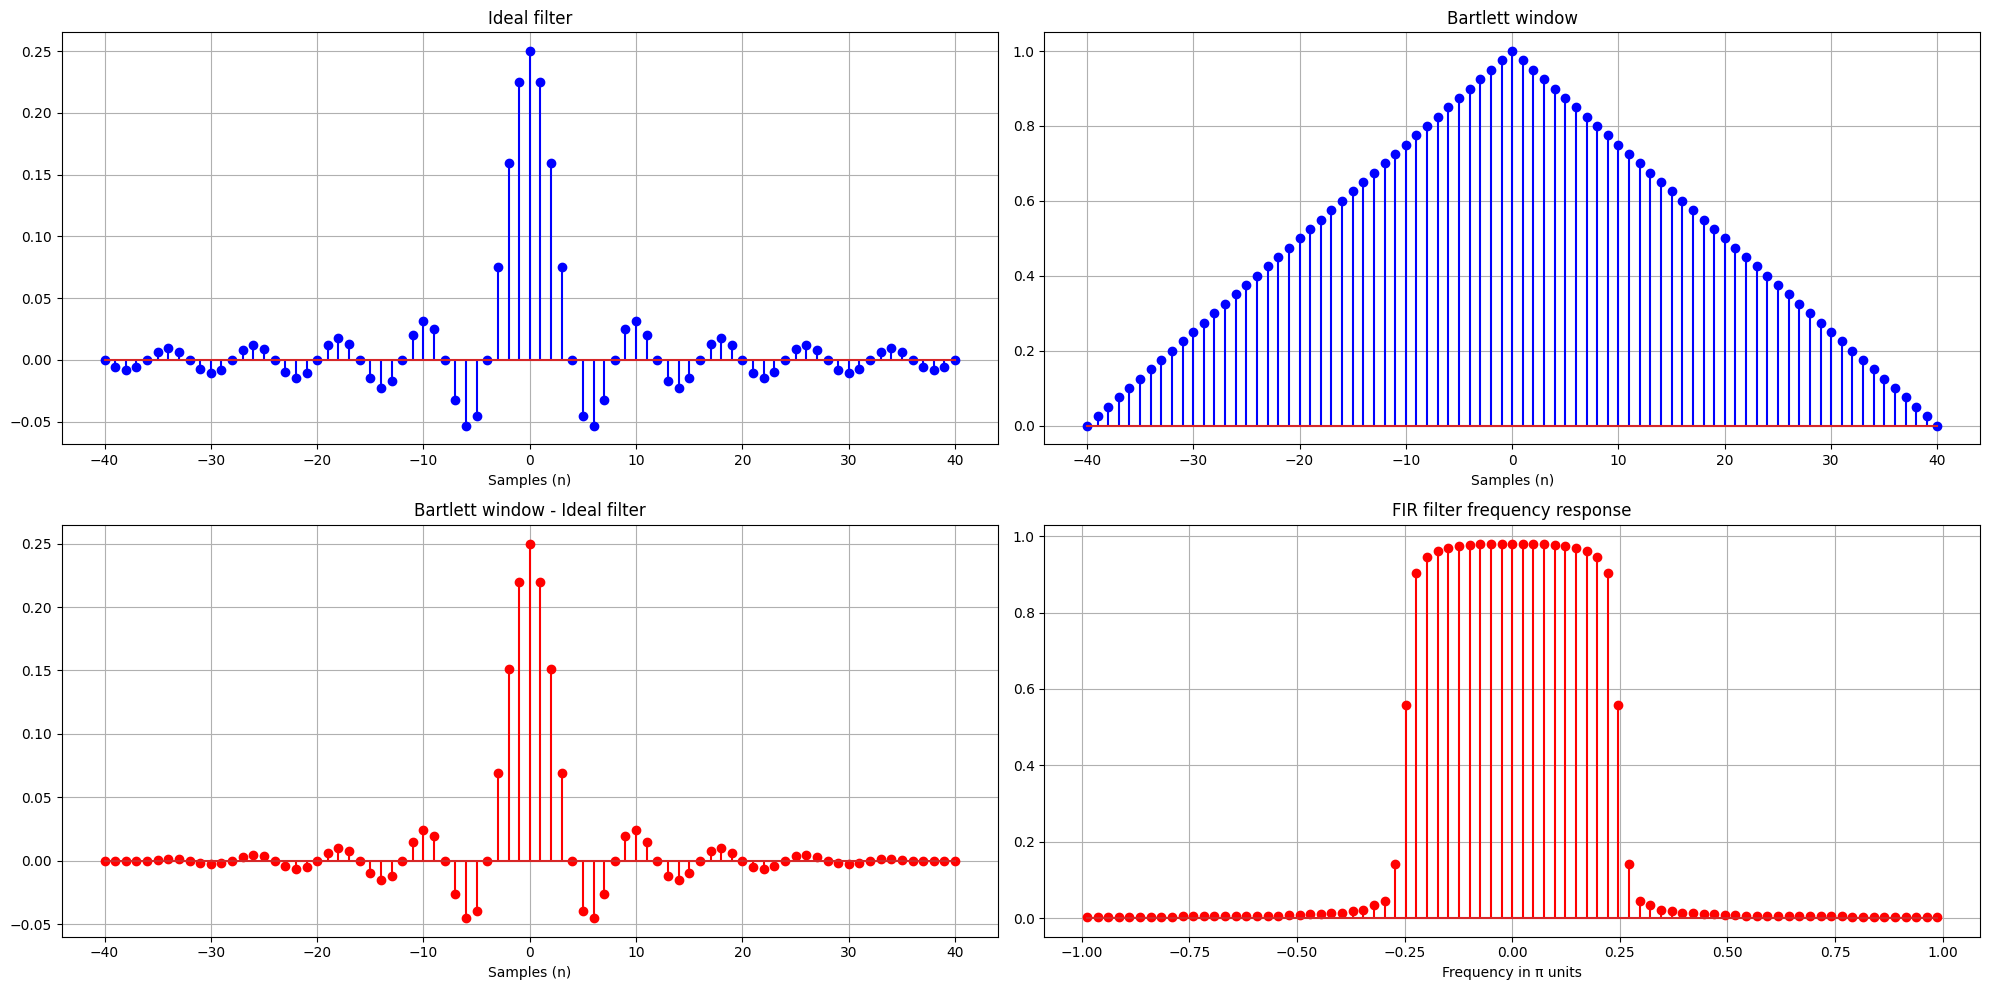

In [12]:
#Bartlett (Triangular)
import numpy as np
import matplotlib.pyplot as plt

#Filtro deseado (Imaginamos que es infinito)
n = np.arange(-40, 41)
h = 0.25 * np.sinc(0.25 * n)

#Ventana Bartlett
M = 81                     # Puntos de la ventana
wind = np.bartlett(81)   #<----- comando para hacer la ventana Bartlett


h_new = h * wind            #Nuevo filtro


H = np.fft.fftshift(np.fft.fft(h_new))
w = 2 * np.pi * np.arange(len(H)) / len(H)
w = np.fft.fftshift(w)
w = np.unwrap(w - 2 * np.pi)

plt.figure(5)
plt.figure(5).set_size_inches(20, 10)

plt.subplot(2, 2, 1)
plt.stem(n, h, "b")     #Filtro infinito
plt.xlabel("Samples (n)")
plt.title("Ideal filter")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.stem(n, wind, "b")  #Ventana
plt.xlabel("Samples (n)")
plt.title("Bartlett window")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.stem(n, h_new, "r") #Nuevo filtro
plt.xlabel("Samples (n)")
plt.title("Bartlett window - Ideal filter")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.stem(w / np.pi, np.abs(H), "r") #Respuesta en frecuencia del filtro
plt.xlabel("Frequency in π units")
plt.title("FIR filter frequency response")
plt.grid(True)

plt.tight_layout()


**Hanning**

$$w[n]=\begin{cases}0.5-0.5\cos (2\pi n/M),\quad 0 \leq n \leq M \\ 0,\quad \text{otherwise}\end{cases}$$

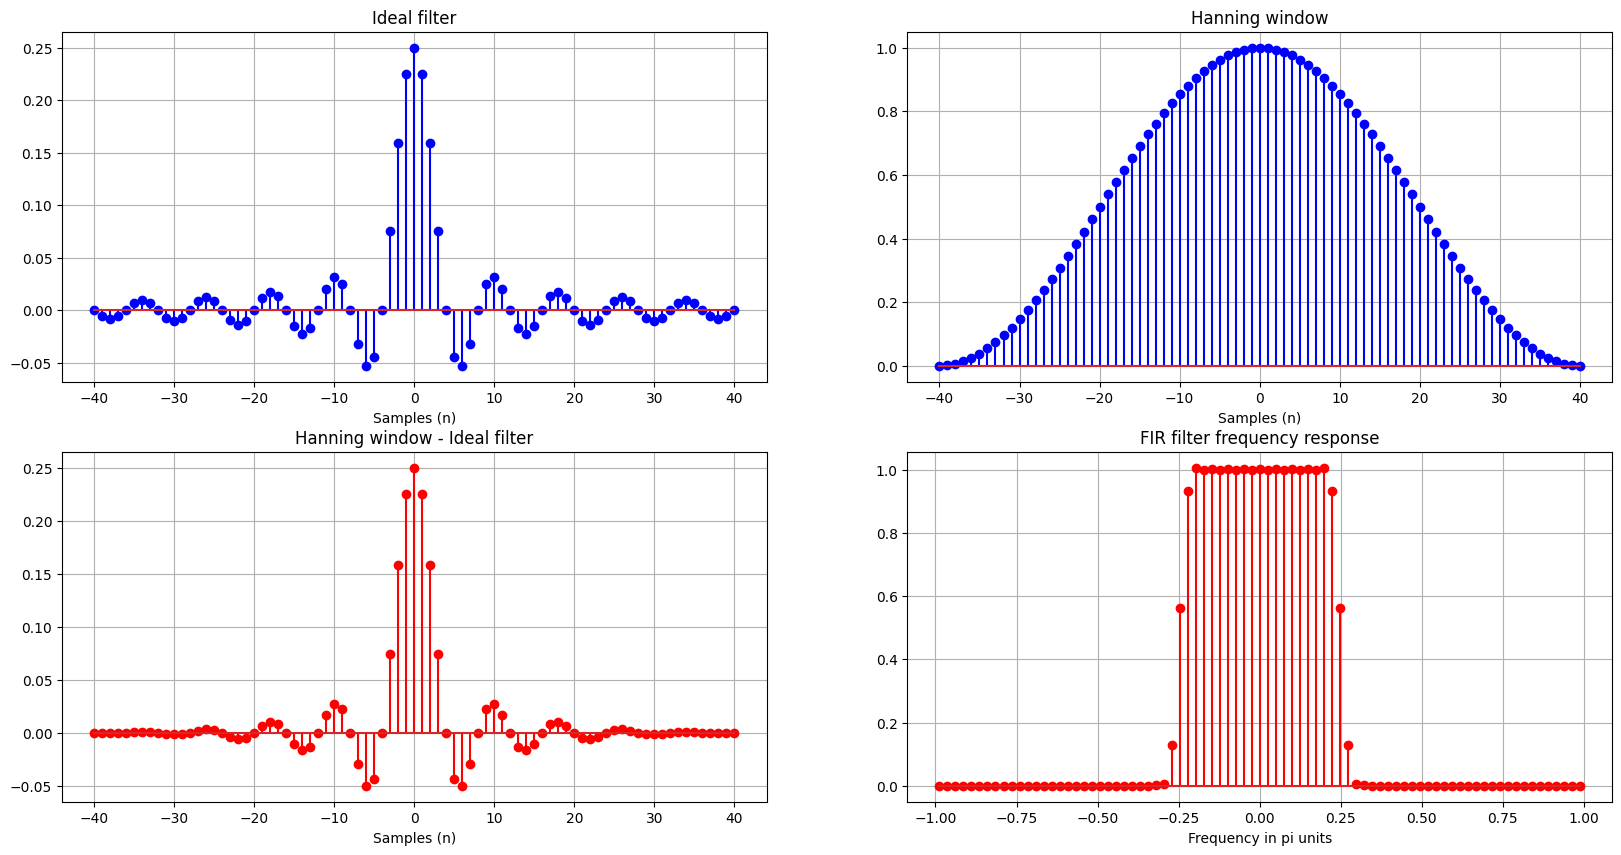

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Apply Hanning window of M = 81 to an ideal filter
#Filtro ideal
n = np.arange(-40, 41)
h = 0.25 * np.sinc(0.25 * n)

#Ventana, M=81 longitud de la ventana
wind = np.hanning(81)

#Nuevo filtro
h_new = h * wind

#Respuesta en frecuencia 
H = np.fft.fftshift(np.fft.fft(h_new))
w = np.fft.fftshift(2 * np.pi * np.arange(len(H)) / len(H))
w = np.unwrap(w - 2 * np.pi)

plt.figure(6, figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.stem(n, h, "b")
plt.xlabel("Samples (n)")
plt.title("Ideal filter")
plt.grid(True)
plt.subplot(2, 2, 2)
plt.stem(n, wind, "b")
plt.xlabel("Samples (n)")
plt.title("Hanning window")
plt.grid(True)
plt.subplot(2, 2, 3)
plt.stem(n, h_new, "r")
plt.xlabel("Samples (n)")
plt.title("Hanning window - Ideal filter")
plt.grid(True)
plt.subplot(2, 2, 4)
plt.stem(w / np.pi, np.abs(H), "r")
plt.xlabel("Frequency in pi units")
plt.title("FIR filter frequency response")
plt.grid(True)
plt.show()

**Hamming**

$$w[n]=\begin{cases}0.54-0.46\cos(2\pi n/M),\quad 0\leq n \leq M \\ 0,\quad \text{otherwise}\end{cases}$$

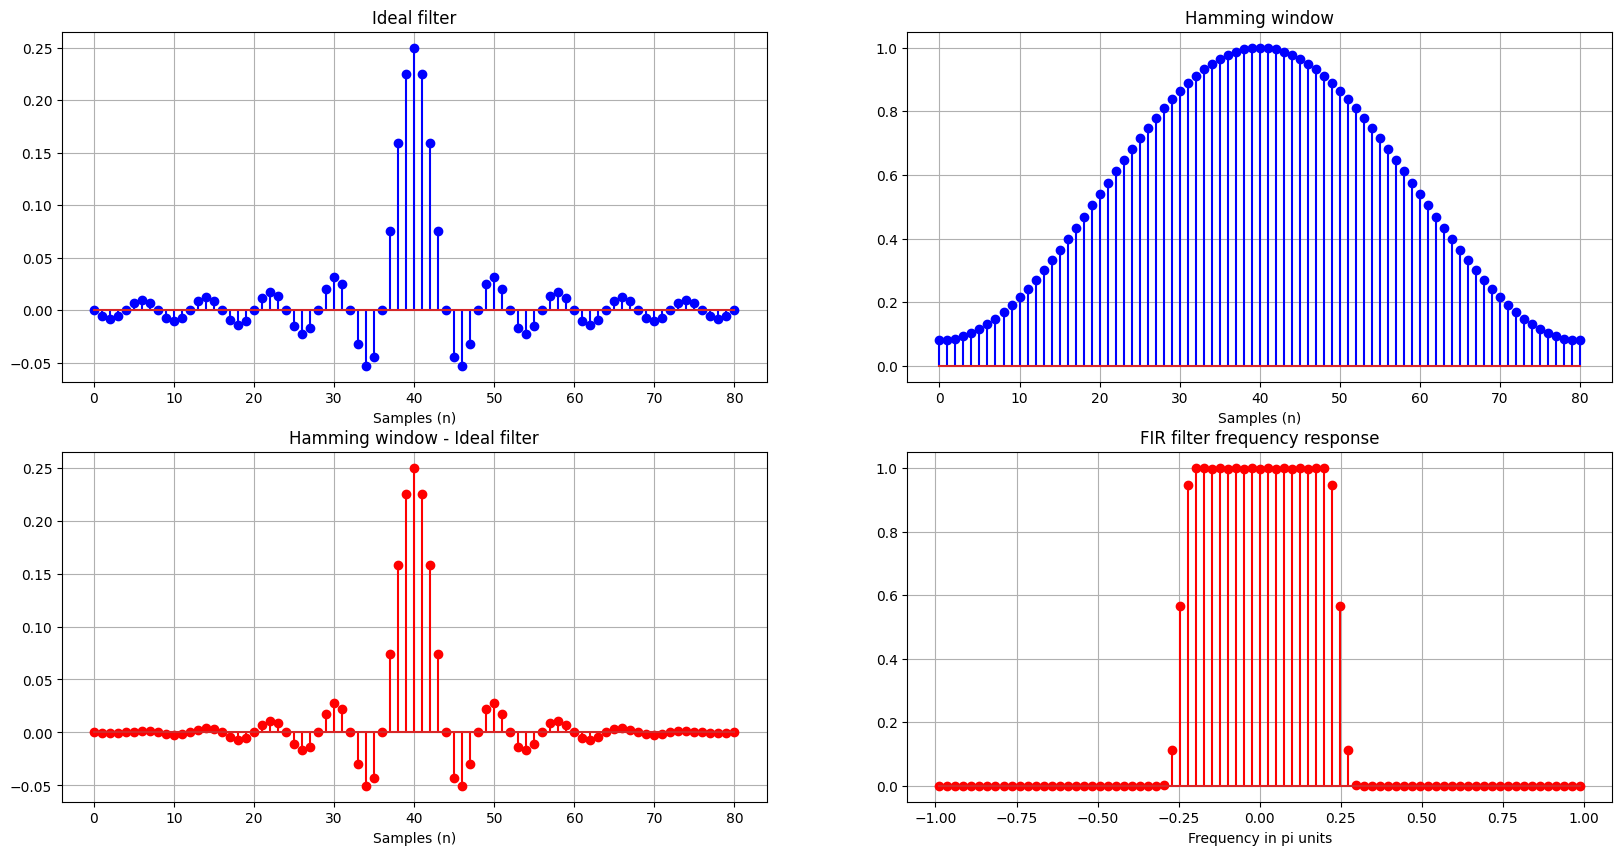

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Filtro ideal
n = np.arange(-40, 41)
h = 0.25*np.sinc(0.25*n)

#Ventana Hamming, M = 81
n = np.arange(len(h))
wind = np.hamming(81)       #<---

#Nuevo filtro
h_new = h*wind

#Repsuesta en frecuencia
H = np.fft.fftshift(np.fft.fft(h_new))
w = np.fft.fftshift(2*np.pi*np.arange(len(H))/len(H))
w = np.unwrap(w - 2*np.pi)


fig = plt.figure(7, figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.stem(n, h, 'b')
plt.xlabel('Samples (n)')
plt.title('Ideal filter')
plt.grid(True)
plt.subplot(2, 2, 2)
plt.stem(n, wind, 'b')
plt.xlabel('Samples (n)')
plt.title('Hamming window')
plt.grid(True)
plt.subplot(2, 2, 3)
plt.stem(n, h_new, 'r')
plt.xlabel('Samples (n)')
plt.title('Hamming window - Ideal filter')
plt.grid(True)
plt.subplot(2, 2, 4)
plt.stem(w/np.pi, np.abs(H), 'r')
plt.xlabel('Frequency in pi units')
plt.title('FIR filter frequency response')
plt.grid(True)
plt.show()


![imagen5](https://github.com/piero-latorre/DSP/blob/main/VIII/image_4.png?raw=true)

Figure 5. Commonly used windows

![imagen6](https://github.com/piero-latorre/DSP/blob/main/VIII/image_5.png?raw=true)

Figure 6. Fourier transforms of windows (M=50).

![imagen7](https://github.com/piero-latorre/DSP/blob/main/VIII/image_6.png?raw=true)

Figure 7. Design parameters for FIR filter using Window method.

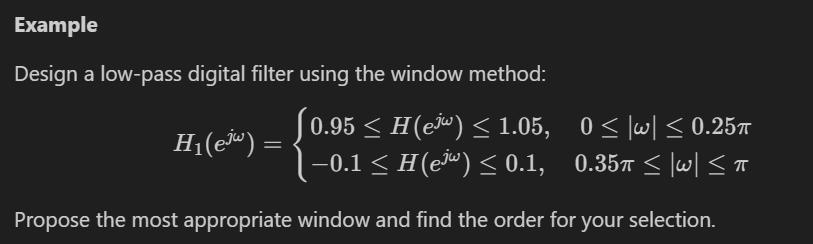

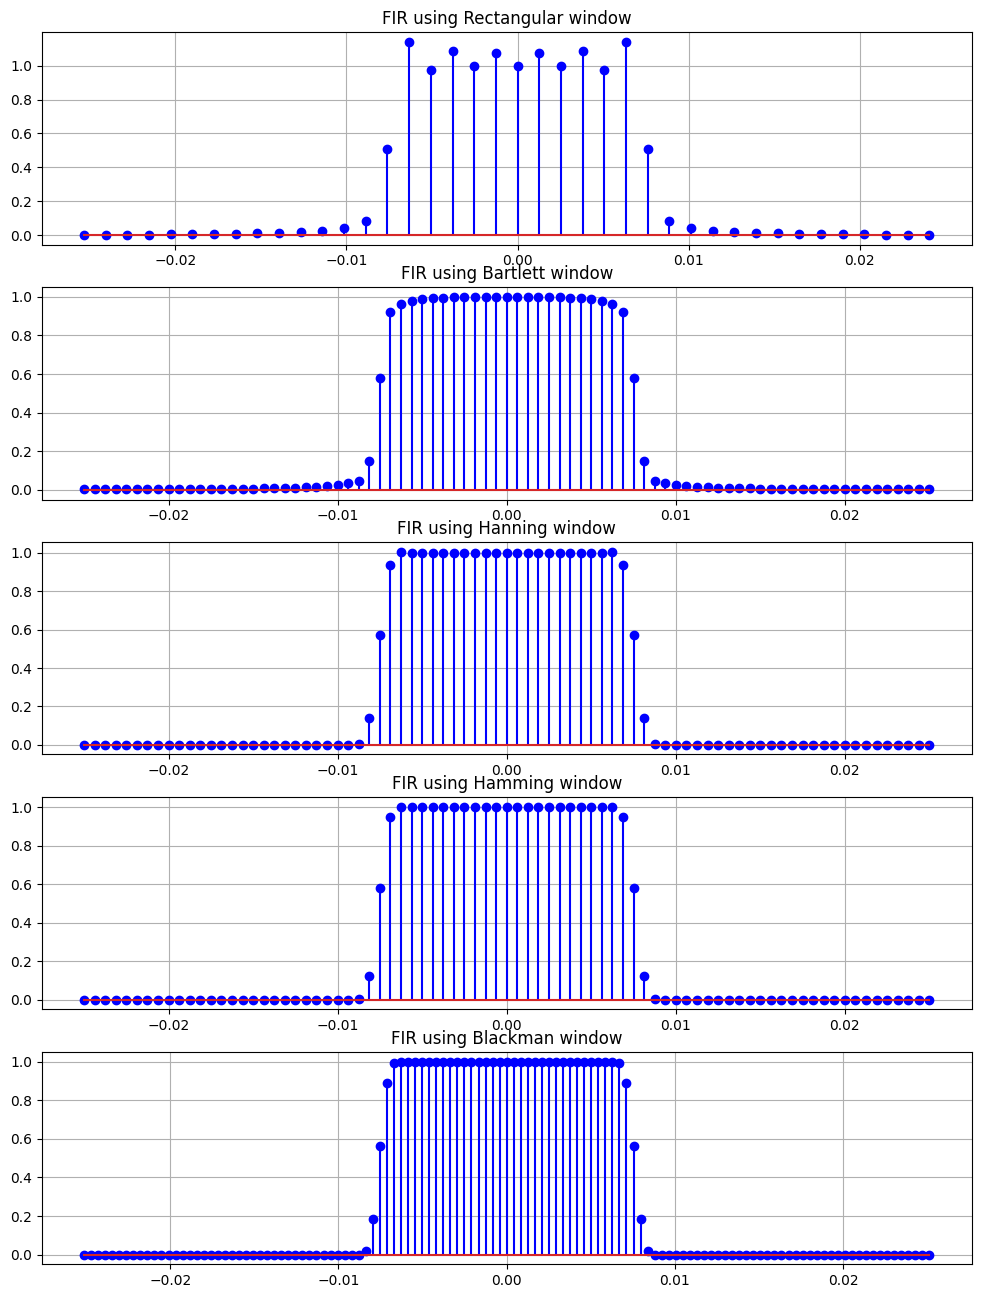

In [15]:
from scipy.signal import firwin
from numpy.fft import fft, fftshift, fftfreq

# d1 = -20*np.log10(1/(1-0.05))
# d2 = 20*np.log10(0.1)

#Definir la banda de transición
wp = 0.25
ws = 0.35
dw = ws-wp

#Longitud de las ventanas
M_rect = int(np.floor((4/dw)-1))
M_bart = int(np.floor(8/dw))
M_hann = int(np.floor(8/dw))
M_hamm = int(np.floor(8/dw))
M_blac = int(np.floor(12/dw))

wc = 0.3

#Ventanas
h_rect = firwin(M_rect+1, wc, window='rectangular')     #<----- firwin: comando de ventana con frecuencia de corte
h_bart = firwin(M_bart+1, wc, window='bartlett')
h_hann = firwin(M_hann+1, wc, window='hann')

h_hamm = firwin(M_hamm+1, wc, window='hamming')
h_blac = firwin(M_blac+1, wc, window='blackman')

#Respuesta en frecuencia de las ventanas
H_rect = fftshift(fft(h_rect))
H_bart = fftshift(fft(h_bart))
H_hann = fftshift(fft(h_hann))
H_hamm = fftshift(fft(h_hamm))
H_blac = fftshift(fft(h_blac))

#Dominio de las respuestas en frecuencias 
w_rect = fftshift(fftfreq(len(H_rect))/2/np.pi)
w_bart = fftshift(fftfreq(len(H_bart))/2/np.pi)
w_hann = fftshift(fftfreq(len(H_hann))/2/np.pi)
w_hamm = fftshift(fftfreq(len(H_hamm))/2/np.pi)
w_blac = fftshift(fftfreq(len(H_blac))/2/np.pi)

#Plot
plt.figure(figsize=(12,16))
plt.subplot(5, 1, 1); plt.stem(w_rect/np.pi, abs(H_rect), "b"); plt.title("FIR using Rectangular window"); plt.grid(True)
plt.subplot(5, 1, 2); plt.stem(w_bart/np.pi, abs(H_bart), "b"); plt.title("FIR using Bartlett window"); plt.grid(True)
plt.subplot(5, 1, 3); plt.stem(w_hann/np.pi, abs(H_hann), "b"); plt.title("FIR using Hanning window"); plt.grid(True)
plt.subplot(5, 1, 4); plt.stem(w_hamm/np.pi, abs(H_hamm), "b"); plt.title("FIR using Hamming window"); plt.grid(True)
plt.subplot(5, 1, 5); plt.stem(w_blac/np.pi, abs(H_blac), "b"); plt.title("FIR using Blackman window"); plt.grid(True)


# Metodo FREQUENCY SAMPLING

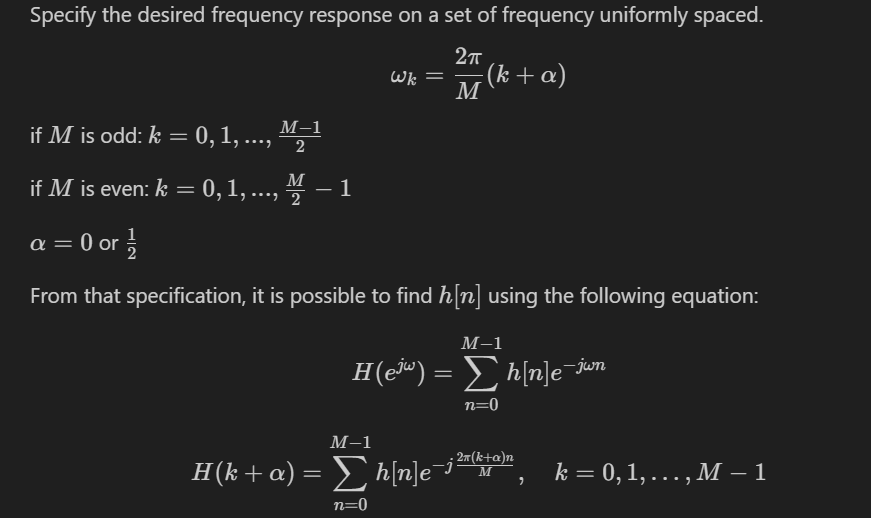

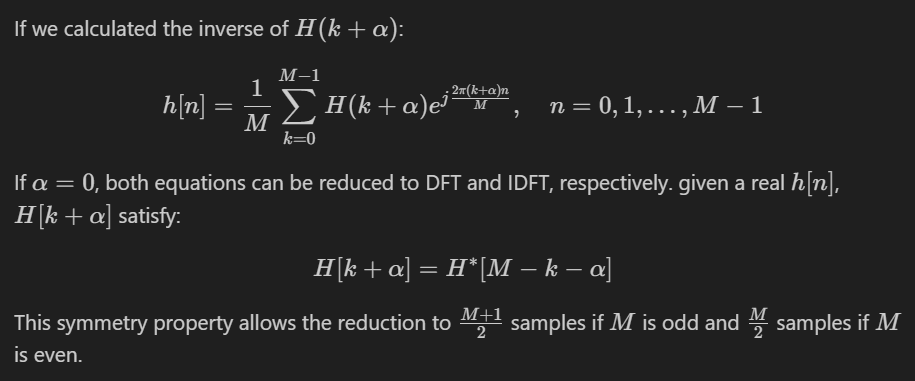

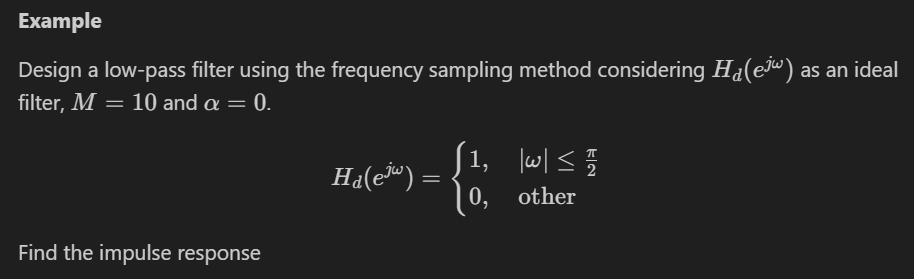

[0.  0.2 0.4 0.6 0.8 1. ]
[1 1 1 0 0 0]


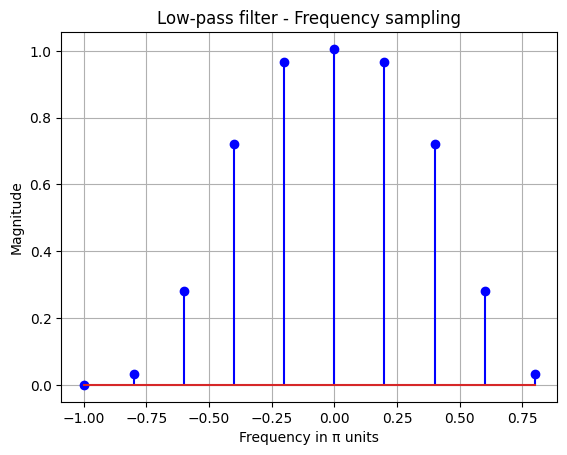

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal  import firwin2

M = 10
k = np.arange(0, M/2 +1)

wk = 2 * k / M

a = np.array(wk < 0.5, dtype=int)

print(wk)
print(a)

# h = np.fft.ifftshift(np.fft.ifft(np.fft.fftshift(a)))
h = firwin2(M,wk,a)
H = np.fft.fftshift(np.fft.fft(h))
w = np.unwrap(np.fft.fftshift(2 * np.pi * np.arange(len(H)) / len(H)) - 2 * np.pi)

plt.stem(w/np.pi, np.abs(H), 'b')
plt.xlabel('Frequency in π units')
plt.ylabel('Magnitude')
plt.title('Low-pass filter - Frequency sampling')
plt.grid(True)
plt.show()


# Clase 9 - Diseño de filtro - Respuesta de impulso infinito

### **Bases para diseñar un filtro IIR**

Existen múltiples métodos que permiten el diseño de filtros IIR a partir del diseño de filtros analógicos. Vamos a ver 2
* Impulse invariance method (Método de invariancia de impulso)

* Bilinear transformation method (Método de transformación bilineal)
  
![Alt text](iir1.jpg)

![Alt text](iir2.jpg)

**Estabilidad de $H(s)$:** todos los polos están en el semiplano **izquierdo**. Entonces, para que la conversión de un filtro analógico a un filtro digital sea consistente, se deben cumplir las siguientes propiedades:

* El eje $j\Omega$ del plano $s$ debe estar proyectado en el círculo unitario en el plano $z$. Entonces, tiene que haber una relación directa entre $s$ y $z$.

* El semiplano izquierdo $s$ debe mapearse dentro del círculo unitario del plano $z$. Entonces, un filtro analógico estable será un filtro discreto estable.



### **MÉTODO 1: Impulse invariance method (Método de invariancia de impulso)**

Filtro digital con respuesta de impulso $h[n]$ tiene una respuesta de frecuencia:

**Consideraciones**
* Se necesita un $T_d$ apropiado para evitar el aliasing en la respuesta de frecuencia del filtro analógico.

* Se puede diseñar un filtro pasa baja pero no un pasa alta xq se genera aliasing.

* A partir de la muestra de frecuencia de impulso, el mapeo del plano $S$ y el plano $Z$ viene dado por la relación entre la transformada Z de $h[n]$ y la transformada de Laplace de $h_a(t)$:

$$H(z)|_{z=e^{st}}=\sum_{m=0}^\infty h[n]e^{-sT_dn}=\frac{1}{T_d}\sum_{ k=-\infty}^\infty H_a\left(s-j\frac{2\pi k}{T_d}\right)$$
Entonces, la relación directa entre las variables es $z=e^{sT_d}$.

Definiendo: $s=\sigma + j\Omega$ y $z=re^{j\omega}$ entonces:

$$z=re^{j\omega}=e^{\sigma T_d}e^{j\Omega T_d}$$
$$z=e^{\sigma T_d};\quad \omega=\Omega T$$
* Si $\sigma < 0$ (semiplano izquierdo en $s$) $\rightarrow 0 < r < 1$ (dentro del círculo unitario en $z$).

* Si $\sigma > 0$ (semiplano derecho en $s$) $\rightarrow r>1$ (fuera del círculo unitario en $z$).

* El sistema estable analógico implica un sistema discreto estable.

* El mapa del eje $j\Omega$ dentro del círculo unitario no es una correspondencia uno a uno.

* La relación $\omega=\Omega T_d$ implica que el intervalo $\frac{(2k-1)\pi}{T_d}\leq\Omega\leq \frac{(2k+1)\pi}{T_d} $ se proyecta a $-\pi\leq\omega\leq\pi, \forall k \in Z$.

* Esta correspondencia refleja el efecto de muestreo y aliasing del método utilizado.

Entonces, la función de transferencia del diseño del sistema IIR es:

$$H(z)=\sum_{k=1}^N\frac{c_k}{1-e^{p_kT_d}z^{-1}}$$
Cuál es la función de transferencia del filtro discreto diseñado. Finalmente, la función de transferencia del filtro digital tiene polos en:

$$z_k=e^{p_kT_d};\quad k=1,2,\dots,N$$

### **Como obtenemos un filtro IIR**

De la explicación anterior, se puede concluir que el diseño del filtro de la respuesta de impulso infinita se basa en:

* Diseño de filtro analógico con una respuesta de frecuencia deseada.

* Ejecución de la conversión de $H(s)$ a $H(z)$ conservando las características del filtro analógico.

**Butterworth filter**

Filtro basado en polos con un espectro de magnitud característico. $|H(j\Omega)|^{2}$ es monótono en la banda de paso y en la banda de parada. El $N$ requerido para obtener una atenuación $\delta_2$ en una frecuencia específica $\Omega_s$ se obtiene de:

$$|H(j\Omega)|^2=\frac{1}{\left(1+\frac{\Omega}{\Omega_c}\right)^{2N}} = \frac{1}{1+\epsilon^2\left(\frac{\Omega}{\Omega_p}\right)^{2N}} = \delta_2^2$$

Dónde:
* $N$: orden de filtrado

* $\Omega_c$: frecuencia de corte: $|H(j\Omega)|^{2}=-3dB$

* $\Omega_p$: frecuencia de paso: $|H(j\Omega)|^{2}=-\frac{1}{1+e^{2}}dB$

Los polos $s_k$ están en un círculo con un radio de $\Omega_c$ en puntos igualmente espaciados:

De lo anterior se puede concluir que el filtro Butterworth está completamente caracterizado por $N$, $\delta_2$ y la relación $\frac{\Omega_s}{\Omega_c}$.

**Filtro Chebyshev**

Filtro de orden bajo (utilizando menos recursos, una implementación simple) para distribuir el error de aproximación a la respuesta deseada de manera uniforme en la banda de paso y en la banda de parada. Esto es posible a partir de un diseño que genera una ondulación constante en esas bandas en lugar de un comportamiento monótono.

Entonces:

* Filtro Chebyshev tipo I: ondulación constante en la banda de paso y monotonicidad en la banda de parada.

* Filtro Chebyshev tipo II: ondulación constante en la banda de parada y monotonicidad en la banda de paso.

### **Ejemplo**

Design a digital filter that met the following characteristics:

$$0.89125\leq|H(e^{j\omega})|\leq1;\quad 0\leq|\omega|\leq0.2\pi$$
$$|H(e^{j\omega})|\leq0.17783;\quad 0.3\pi\leq|\omega|\leq\pi$$



1.   Use the impulse invariant method and use the Butterworth filter as a prototype.
2.   Use the bilinear method and use the Butterworth filter as a prototype.
3.   Compare the frequecy response of the digital filters obtained for both methods.


#### **Solución A** 
**PASO 1:**

We need to define $T_d$, and make $\Omega =\frac{\omega }{T_d }$, as $T_d$ will cancel in  further operations, this value does not matter so, conveniently, we select $T_d = 1$.

Which means that the continuous filter has the following characteristics:

$|H_c(j0.2\pi)|\geq0.89125$ (se mete el 0.2pi)

$|H_c(j0.3\pi)|\leq0.17783$ (se mete el 0.3pi)

which in decibels is:

$20\log_{10}(|H_c(j0.2\pi)|)\geq-1 dB$

$20\log_{10}(|H_c(j0.3\pi)|)\leq-15 dB$

**PASO 2:**

Design the prototype continuous **Butterworth filter**. This consists of two substeps

In [17]:
# 2.1: Determine the order of the prototype continuous Butterworth filter (N) and the cuttof frequency (Omega).                                                                                                    
import numpy as np
from scipy import signal

N, Omega_c = signal.buttord(0.2*np.pi, 0.3*np.pi, 1, 15, analog=True)  


# 2.2: Get the coeeficients of the prototype filter
bProtype, aProtype = signal.butter(N, Omega_c, analog=True) 

     #----->(Hc1, Hc2, dB1, dB2, analog=True)

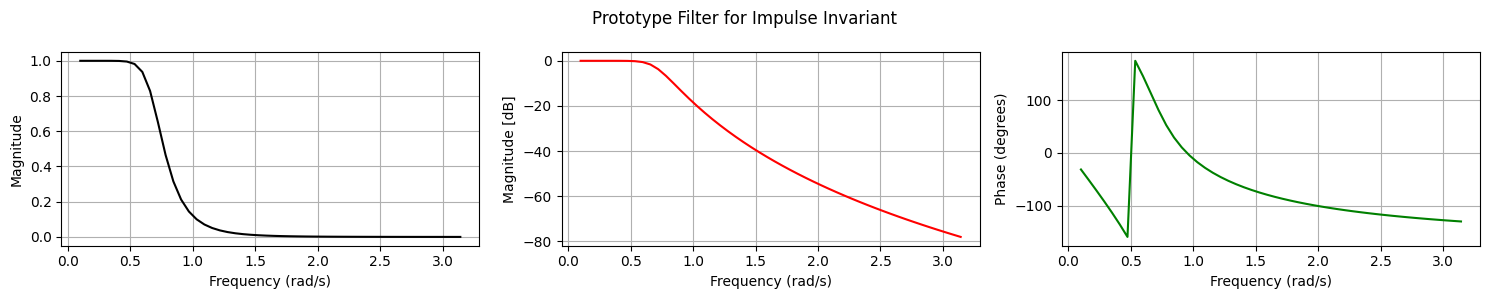

In [18]:
# Comprobamos la frequency response
Omega_axis = np.linspace(0.1, np.pi);
angular_freq, freq_response_continuos = signal.freqs(bProtype, aProtype, worN=Omega_axis)       #signal.freqs(coef num, coefden, worN=cant de frecuencias)

# Ploteamos en magnitud, decibeles y fase
# Función ploteo en magnitud 
def plot_mg(subplot, Omega_axis, mag, ejex):                #ejex para el prototipo: 'Frequency (rad/s)'
                                                            #ejex para el filtro digital: 'Normalized Frequency (rad)'
    plt.subplot(subplot)
    plt.plot(Omega_axis, mag, 'k')                          #prototipo = omega, x // #digital = w,x
    plt.xlabel('Frequency (rad/s)'); plt.ylabel('Magnitude')
    plt.grid(True)

# Función ploteo en magnitud en dB
def plot_mg_dB(subplot, Omega_axis, magdB, ejex):           #ejex para el prototipo: 'Frequency (rad/s)'
                                                            #ejex para el filtro digital: 'Normalized Frequency (rad)'
    plt.subplot(subplot)
    plt.plot(Omega_axis, magdB, 'r')                        #prototipo = omega, x // #digital = w,x
    plt.xlabel('Frequency (rad/s)'); plt.ylabel('Magnitude [dB]')
    plt.grid(True)

# Función ploteo en fase
def plot_phaseIIR(subplot, Omega_axis, phasedeg, ejex):     #ejex para el prototipo: 'Frequency (rad/s)'
                                                            #ejex para el filtro digital: 'Normalized Frequency (rad)'
    plt.subplot(subplot)
    plt.plot(Omega_axis, phasedeg, 'g')                     #prototipo = omega, x // #digital = w,x
    plt.xlabel('Frequency (rad/s)'); plt.ylabel('Phase (degrees)')
    plt.grid(True)

mag = abs(freq_response_continuos);
magdB = 20*np.log10(mag);                                   # Conversión a dB
phase = np.angle(freq_response_continuos);
phasedeg = phase*180/np.pi;

plt.figure(figsize=(15, 3))
plt.suptitle('Prototype Filter for Impulse Invariant')
plot_mg(131, Omega_axis, mag, 'Frequency (rad/s)')
plot_mg_dB(132, Omega_axis, magdB, 'Frequency (rad/s)')
plot_phaseIIR(133, Omega_axis, phasedeg, 'Frequency (rad/s)')
plt.tight_layout()

**PASO 3:**

Get the digital filter. We need to provide a frequency sampling. This will be 1, because we have chosen $T_d =1$.


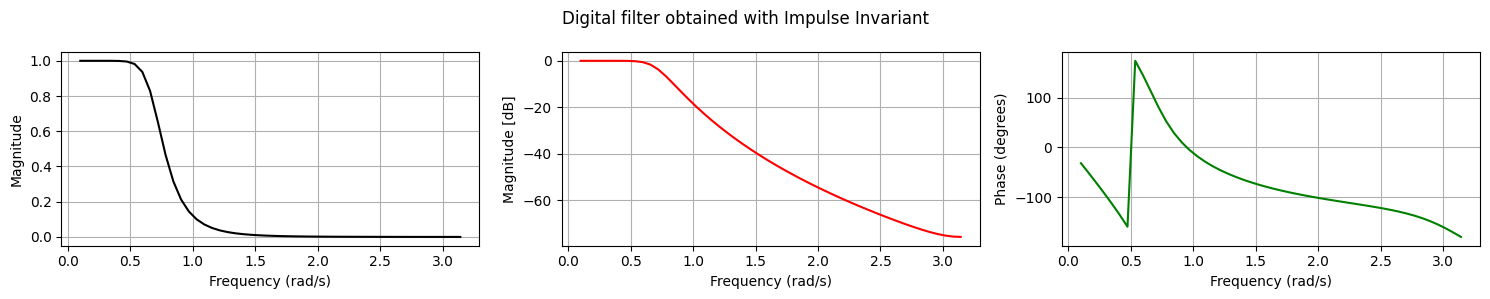

In [19]:
# Función para obtener el filtro IIR digital. 
def impinvar(b, a, fs):
    # Step 1: Partial fractions expansion
    r, p, k = signal.residue(b, a) 
    # Step 2: replace poles
    p = np.exp(p/fs)
    # Step 3: Find coefficients of transfer function
    bz, az = signal.invresz(r, p, k)
    return bz*1/fs, az

Td=1;
Fs = 1/Td;
[bz_imp, az_imp] = impinvar(bProtype, aProtype, Fs)


# Computeamos la respuesta al impulso
w_axis = np.linspace(0.1,np.pi)
angular_freq2, freq_response_digital = signal.freqz(bz_imp, az_imp, w_axis)


# Ploteamos
mag_imp = abs(freq_response_digital)
magdB_imp = 20*np.log10(mag_imp)
phase_imp = np.angle(freq_response_digital)
phasedeg_imp = phase_imp*180/np.pi

plt.figure(figsize=(15, 3))
plt.suptitle('Digital filter obtained with Impulse Invariant')
plot_mg(131, w_axis, mag_imp,'Normalized Frequency (rad)')
plot_mg_dB(132, w_axis, magdB_imp, 'Normalized Frequency (rad)')
plot_phaseIIR(133, w_axis, phasedeg_imp, 'Normalized Frequency (rad)')
plt.tight_layout()

#### **Solución B:** 
**PASO 1:**

Use the digital characteristics and map to the characteristics of the prototype continuos time filter.

We need to map the digital characteristics:

$$0.89125\leq|H(e^{j\omega})|\leq1;\quad 0\leq|\omega|\leq0.2\pi$$

$$|H(e^{j\omega})|\leq0.17783;\quad 0.3\pi\leq|\omega|\leq\pi$$

to a continuous one.


To do this for the bilinear method we use the following transformations. As in the previous question we select $T_d =1$.Thus:

$\Omega=\frac{2}{T_d}\left(\tan\left(\frac{\omega}{2}\right)\right) =2\tan\left(\frac{\omega}{2}\right)$

$\omega=2\arctan \left(\frac{\Omega T_d}{2}\right) =2\arctan \left(\frac{\Omega}{2}\right)$


Then cambiamos $\omega$ por $\Omega$ y pi por infinito:

$0.89125\leq|H_c(j\Omega)|\leq1;\quad 0\leq|\Omega|\leq2\tan\left(\frac{0.2\pi}{2}\right)$

$|H_c(j\Omega)|\leq0.17783;\quad 2\tan\left(\frac{0.3\pi}{2}\right)\leq|\Omega|\leq\infty$

Computing the operations:

$0.89125\leq|H_c(j\Omega)|\leq1;\quad 0\leq|\Omega|\leq0.6498$

$|H_c(j\Omega)|\leq0.17783;\quad 1.0191\leq|\Omega|\leq\infty$

Which means that the continuous filter has the following characteristics:

$|H_c(j0.6498)|\geq0.89125$

$|H_c(j1.0191)|\leq0.17783$

which in deccibels is:

$20\log_{10}\left(|H_c(j2\tan(0.1\pi))|\right)\geq-1 dB$

$20\log_{10}\left(|H_c(j2\tan(0.15\pi))|\right)\leq-15 dB$


**PASO 2:**

Igual que el anterior, diseñamos el Butterworth pero cambiamos las pass - and stopband frequencies

In [20]:
#2.1: Determine the order of the prototype continuous Butterworth filter (N) and the cuttof frequency ($\Omega {\;}_c$).
N, Omega_c = signal.buttord(0.6498, 1.0191, 1, 15, analog=True) 

#2.2 Coeficientes del prototipo
bProtype, aProtype = signal.butter(N, Omega_c, analog=True) 

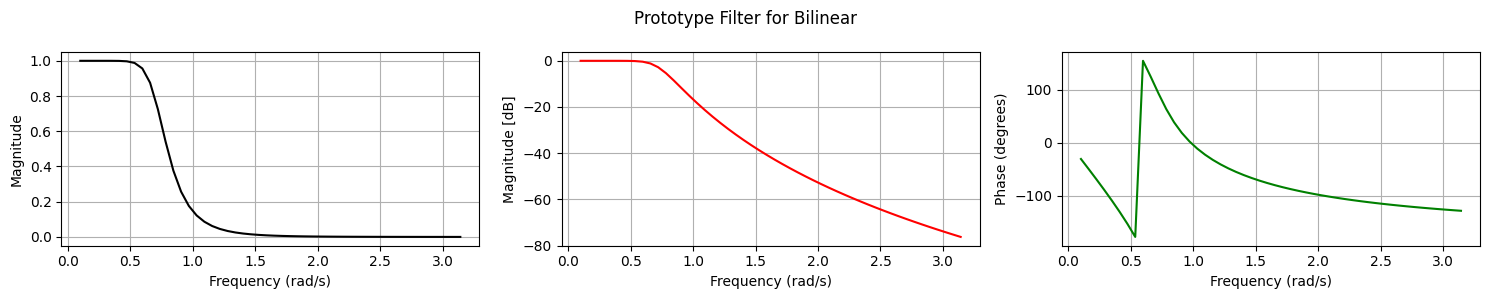

In [21]:
# Computeamos la frequency response
Omega_axis = np.linspace(0.1, np.pi);
angular_freq, freq_response_continuos = signal.freqs(bProtype, aProtype, worN=Omega_axis)


# Ploteamos
mag = abs(freq_response_continuos);
magdB = 20*np.log10(mag);
phase = np.angle(freq_response_continuos);
phasedeg = phase*180/np.pi;

plt.figure(figsize=(15, 3))
plt.suptitle('Prototype Filter for Bilinear')
plot_mg(131, Omega_axis, mag, 'Frequency (rad/s)')
plot_mg_dB(132, Omega_axis, magdB, 'Frequency (rad/s)')
plot_phaseIIR(133, Omega_axis, phasedeg, 'Frequency (rad/s)')
plt.tight_layout()

**PASO 3:**

Get the digital filter.
We do this using the function signal.bilinear. We need to provide a frequency sampling. This will be 1, because we have chosen it earlier.

In [22]:
Td=1;
Fs = 1/Td;
[bz_bil, az_bil] = signal.bilinear(bProtype, aProtype, Fs)

C:\Users\Sofia\AppData\Local\Temp\ipykernel_22408\442585922.py:7: RuntimeWarning: divide by zero encountered in log10
  magdB_bil = 20*np.log10(mag_bil);


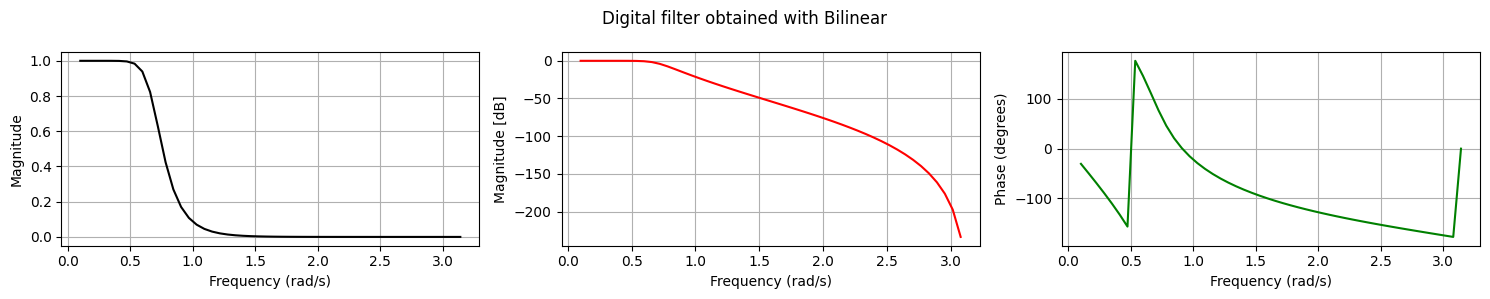

In [23]:
# Computeamos
w_axis = np.linspace(0.1,np.pi)
angular_freq, freq_response_digital = signal.freqz(bz_bil, az_bil, w_axis)

# Ploteamos
mag_bil = abs(freq_response_digital);
magdB_bil = 20*np.log10(mag_bil);
phase_bil = np.angle(freq_response_digital);
phasedeg_bil = phase_bil*180/np.pi;

plt.figure(figsize=(15, 3))
plt.suptitle('Digital filter obtained with Bilinear')
plot_mg(131, w_axis, mag_bil,'Normalized Frequency (rad)')
plot_mg_dB(132, w_axis, magdB_bil, 'Normalized Frequency (rad)')
plot_phaseIIR(133, w_axis, phasedeg_bil, 'Normalized Frequency (rad)')
plt.tight_layout()

#### **Comparación de ambos** 

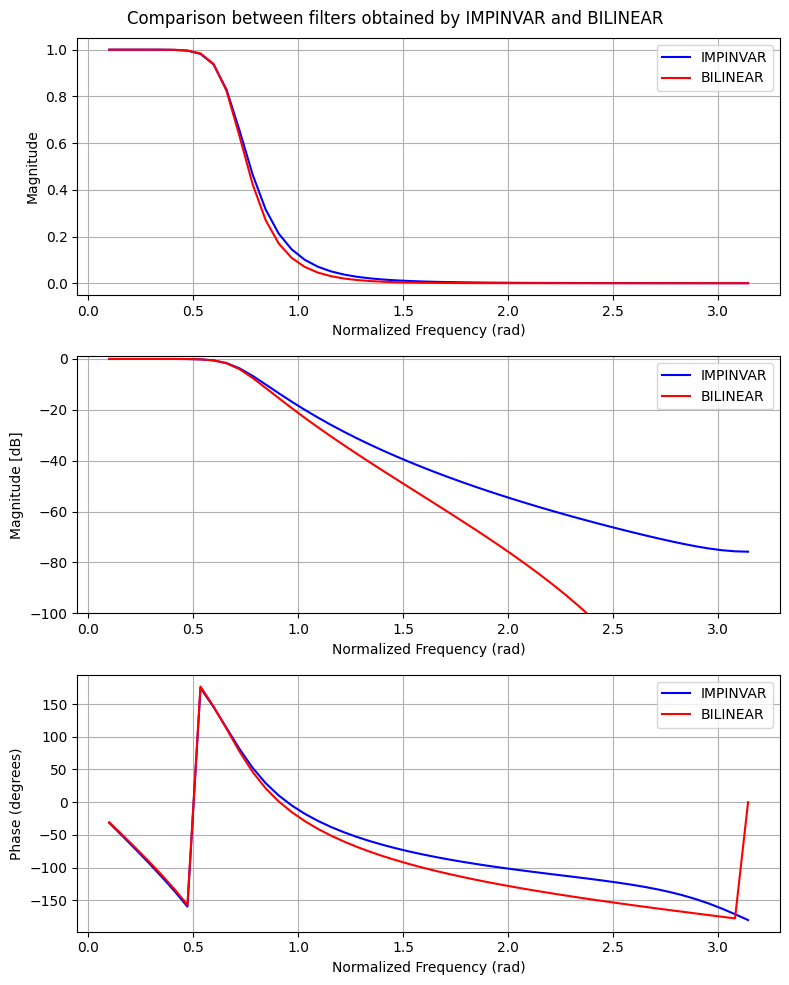

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
plt.suptitle('Comparison between filters obtained by IMPINVAR and BILINEAR')
axs[0].plot(w_axis, mag_imp, 'b', label='IMPINVAR')
axs[0].plot(w_axis, mag_bil, 'r', label='BILINEAR')
axs[0].set_xlabel('Normalized Frequency (rad)')
axs[0].set_ylabel('Magnitude')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(w_axis, magdB_imp, 'b', label='IMPINVAR')
axs[1].plot(w_axis, magdB_bil, 'r', label='BILINEAR')
axs[1].set_xlabel('Normalized Frequency (rad)')
axs[1].set_ylabel('Magnitude [dB]')
axs[1].set_ylim(-100, 1)
axs[1].legend()
axs[1].grid(True)

axs[2].plot(w_axis, phasedeg_imp, 'b', label='IMPINVAR')
axs[2].plot(w_axis, phasedeg_bil, 'r', label='BILINEAR')
axs[2].set_xlabel('Normalized Frequency (rad)')
axs[2].set_ylabel('Phase (degrees)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()

# Clase 10 - Random process

In [25]:
'''
Probabilidad : 

Joint Probability -> P(x <= 3, y >= 5) , X : dado, y : nota de dsp, no se relacionan
    Son eventos independientes lo que se hace es multiplicarlas = P(x<=3) P(y>=5)

Conditional Probability (Probabiliadad condicional) -> P(x <= 3 | z =< 2 ), (Teorema de Bayes)
    Si es q no se condicionan entonces: P(x<=3), no depende de
    Si es q SÍ se condicionan : P(A|B) = P(B|A)P(A) / P(B)
            o P(A,B)/P(A)
'''

'\nProbabilidad : \n\nJoint Probability -> P(x <= 3, y >= 5) , X : dado, y : nota de dsp, no se relacionan\n    Son eventos independientes lo que se hace es multiplicarlas = P(x<=3) P(y>=5)\n\nConditional Probability (Probabiliadad condicional) -> P(x <= 3 | z =< 2 ), (Teorema de Bayes)\n    Si es q no se condicionan entonces: P(x<=3), no depende de\n    Si es q SÍ se condicionan : P(A|B) = P(B|A)P(A) / P(B)\n            o P(A,B)/P(A)\n'

### Binomial distributions
$$P[k]=\binom{N}{k}p^k(1-p)^{N-k}$$
$$\binom{N}{k} = \frac{N!}{k!(N-k)!}$$
for $k=0,1,...,N$.

In [26]:
#Binomial Distributions
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Probability of k = 5 for N = 10 of obtaining head
k = 5
N = 10
p = 9,5 #<----probabilidad
prob = comb(N, k) * 0.5**k * (1-0.5)**(N-k)     #<---- Probabilidad binomial
print(prob)

0.24609375


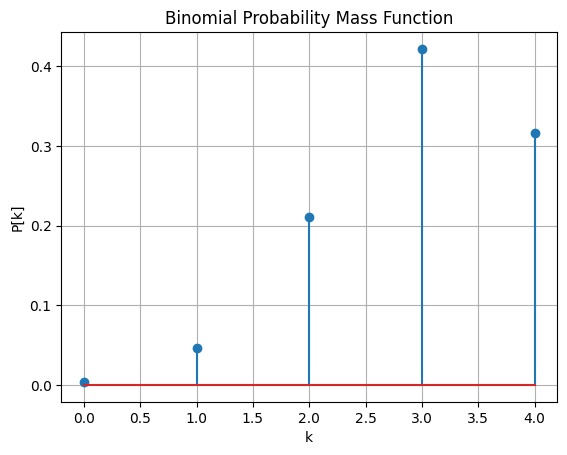

In [27]:
# Obtain the probability mass function for p = 0.75 and N = 4
#p : probabilidad
#N : cantidad de pruebas
N = 4
p = 0.75

K = np.arange(N+1)
probs = np.zeros_like(K, dtype=float)

for k in K:
    probs[k]= comb(N, k) * p**k * (1-p)**(N-k)    #<---- Función de probabilidad

plt.stem(K, probs)
plt.xlabel("k")
plt.ylabel("P[k]")
plt.title("Binomial Probability Mass Function")
plt.grid(True)
plt.show()

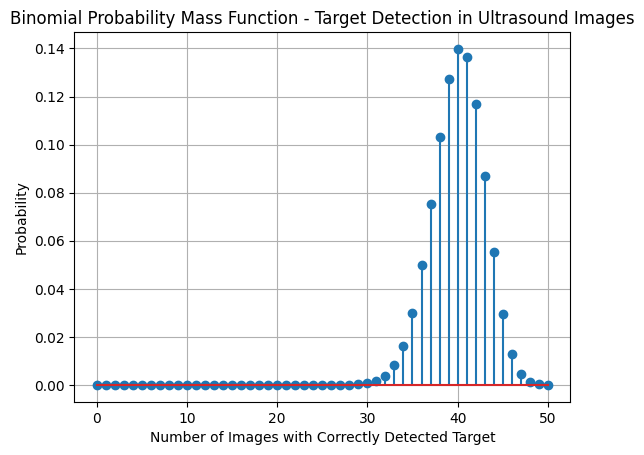

In [28]:
'''Example: Suppose you are working on an ultrasound imaging system and want to
analyze the probability of correctly detecting the presence of a target 
(for example a tumour) within an ultrasound image. Let's assume that the 
probability of correctly detecting the target in any given image is 0.8, and you
plan to analyze 50 ultrasound images.'''

# Parameters
N = 50    # Number of ultrasound images analyzed
p = 0.8   # Probability of correctly detecting the target

K = np.arange(N+1)
probs = np.zeros_like(K, dtype=float)

for k in K:
    probs[k]= comb(N, k) * p**k * (1-p)**(N-k)

plt.stem(K, probs)
plt.xlabel('Number of Images with Correctly Detected Target');
plt.ylabel('Probability');
plt.title('Binomial Probability Mass Function - Target Detection in Ultrasound Images');

plt.grid(True)
plt.show()

In [29]:
'''
Note that you are able to identify the random variable X(s) (The number of images with correctly detected targets) and the sample 
space S ({0, 1, 2, ..., 50}). What is the probability of 40? Easy, this is equal to 0.14 (aprox., check the plot)
As this is a Probability Mass Function, each point represent the probability of the corresponding value in the sample space.
'''

'\nNote that you are able to identify the random variable X(s) (The number of images with correctly detected targets) and the sample \nspace S ({0, 1, 2, ..., 50}). What is the probability of 40? Easy, this is equal to 0.14 (aprox., check the plot)\nAs this is a Probability Mass Function, each point represent the probability of the corresponding value in the sample space.\n'

### **Probability density function (PDF)**
$p(x)=\frac{1}{10\sqrt{2\pi}} \exp \left( -\frac{(x-120)^2}{2(10)^2} \right)$

$p(x)=\frac{1}{sigma\sqrt{2\pi}} \exp \left( -\frac{(x-mu)^2}{2(sigma)^2} \right)$

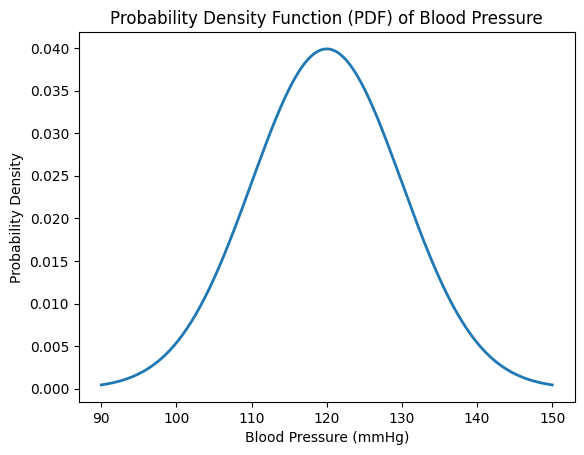

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
mu = 120  # Mean blood pressure (in mmHg)
sigma = 10  # Standard deviation of blood pressure (in mmHg)

# Generate a range of values for blood pressure
step_size = 0.2 
x = np.arange(90, 150 + step_size, step_size)

# Calculate the probability density function (PDF) of the Gaussian distribution
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2)) #<---

# Plotting PDF
plt.plot(x, pdf, linewidth=2)
plt.title('Probability Density Function (PDF) of Blood Pressure')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Probability Density')
plt.show()


In [31]:
'''
El eje y es la densidad de probabilidad. NO ES la probabilidad,
Los limites son la media mas desviaciones estandar(ds)
P(110<x<130) = 0.68     ---> 1ds
P(100<x<140) = 0.95     ---> 2ds        
P(90<x<150) = 0.99     ---> 3ds

'''

'\nEl eje y es la densidad de probabilidad. NO ES la probabilidad,\nLos limites son la media mas desviaciones estandar(ds)\nP(110<x<130) = 0.68     ---> 1ds\nP(100<x<140) = 0.95     ---> 2ds        \nP(90<x<150) = 0.99     ---> 3ds\n\n'

### **Cumulative Distributive Functions (CDF)**

 $x (F_x(x)=P(X\leq x))$

 For example, suppose we roll a dice one time. If we let $x$ denote the number that dice lands on, then the cumulative distribution function for the outcome can be described as follows:

* $P(x\leq 0)$: 0

* $P(x\leq 1): \frac{1}{6}$

* $P(x\leq 2): \frac{2}{6}$

* $P(x\leq 3): \frac{3}{6}$

* $P(x\leq 4): \frac{4}{6}$

* $P(x\leq 5): \frac{5}{6}$

* $P(x\leq 6): \frac{6}{6}$

* $P(x>6): 0$

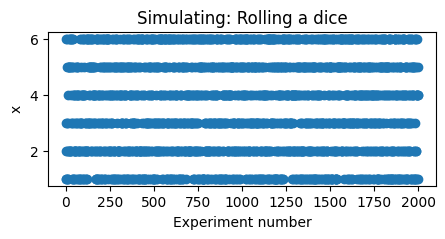

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Obtain the cdf of rolling a dice
x = np.random.randint(1, 7, size=2000)

# Plotting the results
plt.plot(x, 'o')
plt.xlabel("Experiment number")
plt.ylabel("x")
# plt.xlim([0, 50])  # Uncomment if you want to set the x-axis limits
# plt.ylim([0.5, 6.5])  # Uncomment if you want to set the y-axis limits
plt.title("Simulating: Rolling a dice")
# Set figure size
figure_size = [500, 200]  # Width and height in pixels
plt.gcf().set_size_inches(figure_size[0] / 100, figure_size[1] / 100)

plt.show()
plt.show()

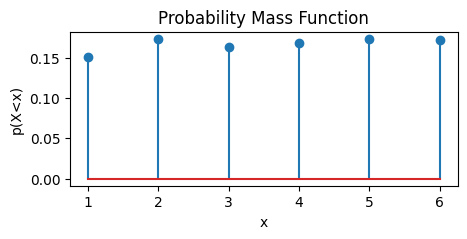

In [33]:
# Count the number of repeated elements using histogram
bin_edges = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])
bin_counts, _ = np.histogram(x, bins=bin_edges)
total_counts = np.sum(bin_counts)
pmf = bin_counts / total_counts

# Plot the PMF --> devuelve la probabilidad de que una variable 
# aleatoria discreta sea exactamente igual a algún valor
centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.stem(centers, pmf, markerfmt='o')
plt.xlabel("x")
plt.ylabel("p(X<x)")
plt.title("Probability Mass Function")

# Set figure size
figure_size = [500, 200]  # Width and height in pixels
plt.gcf().set_size_inches(figure_size[0] / 100, figure_size[1] / 100)

plt.show()

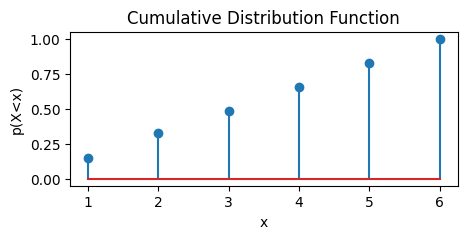

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the cumulative sum of bin counts 
# Suma de los anteriores, es lineal y el max es 1
cdf = np.cumsum(pmf)

# Plot the CDF
plt.stem(centers, cdf, markerfmt='o')
plt.xlabel("x")
plt.ylabel("p(X<x)")
plt.title("Cumulative Distribution Function")

# Set figure size
figure_size = [500, 200]  # Width and height in pixels
plt.gcf().set_size_inches(figure_size[0] / 100, figure_size[1] / 100)

plt.show()

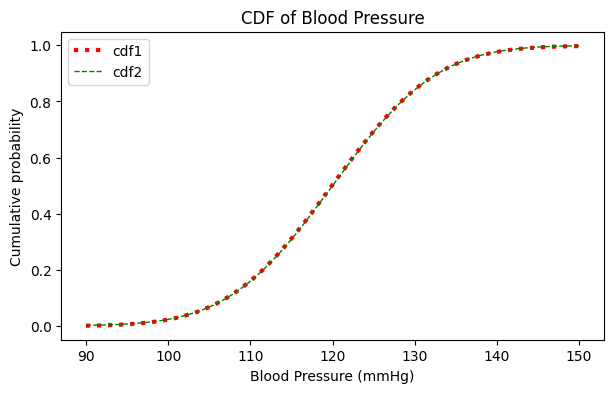

In [35]:
# Let's plot the CDF of our blood pressure example.

from scipy.special import erf

# Parameters
mu = 120  # Mean blood pressure (in mmHg)
sigma = 10  # Standard deviation of blood pressure (in mmHg)
step_size = 0.2  # Step size for visualization values
x = np.arange(90, 150 + step_size, step_size)

# Compute PDF and integrate for CDF (FIRST WAY)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
cdf1 = np.cumsum(pdf) * step_size

# Compute CDF using analytical formula (SECOND WAY)         <---- La segunda manera
cdf2 = 0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2))))     #<---- EL CDF

# Plotting CDF
plt.plot(x, cdf1, color='r', linestyle=':', linewidth=3)
plt.plot(x, cdf2, color='g', linestyle='--', linewidth=1)
plt.title('CDF of Blood Pressure')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Cumulative probability')
plt.legend(['cdf1', 'cdf2'])

# Set figure size
figure_size = [700, 400]  # Width and height in pixels
plt.gcf().set_size_inches(figure_size[0] / 100, figure_size[1] / 100)

plt.show()

In [36]:
### Random variables and processes

''' 
Random Variable : Se le asigna un número a todas las salidas de un experimento random 
Random Process : Se le asigna un tiempo a todas las salidas del experimento random
    También se le puede considerar como un conjunto de variables randoms indexadas por tiempo.

Un proceso Random es una función de variables reales.

#numpy.random.choice(a,size,replace,p)
    
'''

' \nRandom Variable : Se le asigna un número a todas las salidas de un experimento random \nRandom Process : Se le asigna un tiempo a todas las salidas del experimento random\n    También se le puede considerar como un conjunto de variables randoms indexadas por tiempo.\n\nUn proceso Random es una función de variables reales.\n\n#numpy.random.choice(a,size,replace,p)\n    \n'

# Clase 11 - Diseño de filtros digitales - Filtrado de señales aleatorias

**Filtro de Wiener**: sistema óptimo basado en la raíz del error cuadrático medio entre la respuesta del filtro y la señal deseada.

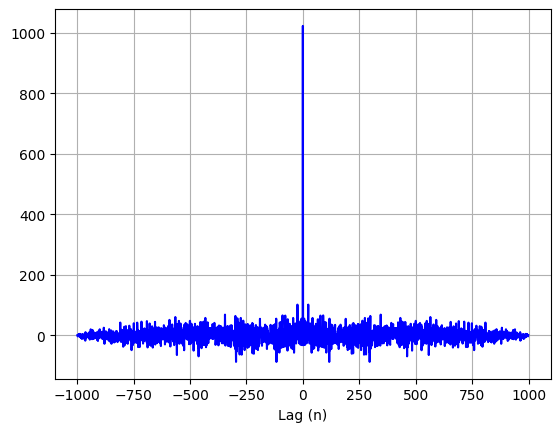

In [37]:
import numpy as np
import matplotlib.pyplot as plt

w = np.random.normal(0, np.sqrt(1), size=1000) #media=0, desviación estandar=sqrt(1), # de muestras 
g = np.correlate(w, w, mode='full') 
lag = np.arange(-(len(w)-1), len(w))
plt.figure(1)
plt.plot(lag, g, 'b')
plt.xlabel('Lag (n)')
plt.grid(True)

### **EX2 - Adaptative filter**

Considering a process: 

$$x\left\lbrack n\right\rbrack =1\ldotp 2728x\left\lbrack n-1\right\rbrack -0\ldotp 81x\left\lbrack n-2\right\rbrack +v\left\lbrack n\right\rbrack$$

where $v\left\lbrack n\right\rbrack$ is a unit variance with noise. Apply the adaptive linear prediction using LMS algorithm.

$$\hat{x} [n]=1.2728x[n-1]-0.81x[n-2]$$

Supongamos que consideramos un predictor lineal adaptativo:

$$\hat{x} =h_n [1]x[n-1]-h_n [2]x[n-2]$$

with LMS algorithm

$$h_{n+1} =h_n [k]+\mu e[n]x[n-k]$$

If $\mu$ es suficientemente pequeño, entonces los coeficientes convergerán en la media a sus valores óptimos:

$$e[n]=x[n]-\hat{x} [n]=[1.2728-h_n [1]]x[n-1]+[-0.81-h_n [2]]x[n-2]+v[n]$$

Therefore:

$$\begin{array}{l}
h_n [1]=1.2728\\
h_n [2]=-0.81
\end{array}$$

And the minimum MSE: $\epsilon_{\min } =\sigma_2^2 =1$. To perform the algorithm, suppose that the weight vector is initialized to zero $h_n =0$ and the step size is defined by two test: $\mu =0\ldotp 02$ and $\mu =0\ldotp 004$.

![figure7](https://github.com/piero-latorre/DSP/blob/main/XI/image_8.png?raw=true)


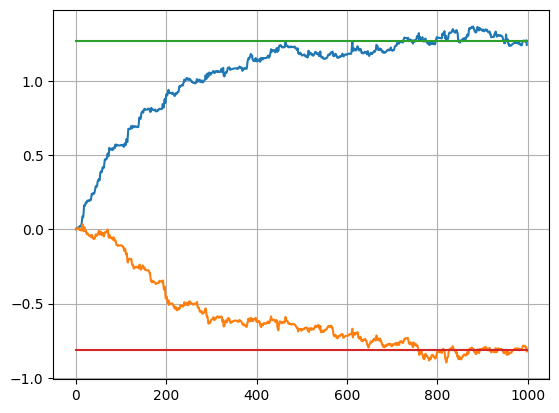

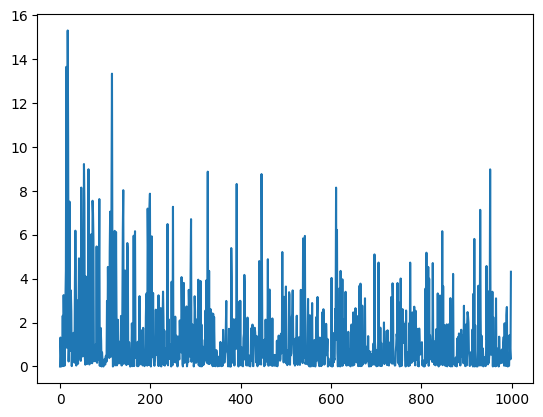

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# Number of experiments
N = 1000

# Noise vector
g = np.random.randn(N)

# Filter coefficients
a = [1, -1.27, 0.81]
x = lfilter([1], a, g)

# Parameters
mu = 0.004
h = np.zeros(2)
er = np.zeros(N-1)

# Filter coefficients
h1 = np.zeros(N-1)
h2 = np.zeros(N-1)

# Loop
for i in range(1, N-1):
    # Algorithm
    d_est = h[0] * x[i] + h[1] * x[i-1]
    e = x[i+1] - d_est
    h[0] = h[0] + mu * e * x[i]
    h[1] = h[1] + mu * e * x[i-1]

    # Coefficients updating
    h1[i] = h[0]
    h2[i] = h[1]
    er[i] = e

# Plot
plt.figure()
plt.plot(np.array([h1, h2]).T)
plt.plot(np.ones(N-1) * 1.27)
plt.plot(np.ones(N-1) * -0.81)
plt.grid(True)

plt.figure(2)
plt.plot(er**2)

#### **Código para predictive Wiener**

In [39]:
from scipy import signal, linalg

def wiener_predict(d,order,offset): #señal deseada, orden(p), desfase(m)
    #1
    x_v = np.concatenate((np.zeros(offset), d[1:-offset]))  # Señal desfasada

    #2--- Predictive Wiener filter coefficients --- #
    rr = signal.correlate(x_v,x_v,"full");                  # autocorrelation x
    rr_idx = rr.size//2   # locate n = 0
    rr_part = rr[rr_idx:rr_idx+order-1]    # vector [r_{xx}(0) ... r_{xx}(P-1)]
    rr_mat = linalg.toeplitz(rr_part)        # autocorrelation matrix \upsilon
    
        #---
    r = signal.correlate(d,x_v,"full");         # cross-correlation dx
    r_idx = r.size//2     # locate n = 0
    r_part = r[r_idx:r_idx+order-1]        # vector \rho= [r_{dx}(0) ... r_{dx}(P-1)]

    #3
    h_opt = np.linalg.inv(rr_mat) @ r_part.T     # linear system solution
    d_hat = np.convolve(x_v, h_opt,'same')              # estimated signal
    #e_est = d-d_hat

    return d_hat, h_opt, x_v     #Estimated signal, h_optimo, x_v Señal desfasada 

# --- Plots --- #
plt.figure(figsize=(8,3))
plt.plot( d, '-r')
plt.plot( x_v, '-k')
plt.plot( d_hat, '-b');
plt.legend(['desired sig. $d[n]$','delayed sig. $x[n]$', 'estimated sig. $\hat{d}[n]$']);
plt.title('Predictive Wiener Filter')
plt.show()

paso de entrada: high mu always


#### **Codigo filtro wiener**

In [1]:
def wiener_ACN (x, order, v2): # Wiener Filter for Noise Cancellation
  n= np.arange(len(x))

  #The equation follows:
  #(Rv)(h_opt)=(r_xv)
    
  #r_v2_v2=toeplitz(autocorr(v2)); %Autocorrelation Matrix (Rv) ----

  rr = signal.correlate(v2,v2,"same");                  # autocorrelation v2   
  rr_idx = rr.size//2                                   # locate n = 0
  rr_part = rr[rr_idx:rr_idx+order-1]                   # vector [r_{xx}(0) ... r_{xx}(P-1)]
  rr_mat = linalg.toeplitz(rr_part)                     # autocorrelation matrix \upsilon
    
  #r_x_v2=corr(x,v2); %Correlation between x[n] and v_2[n] (r_xv) ----

  r = signal.correlate(x,v2,"full");                   # cross-correlation dx
  r_idx = r.size//2                                     # locate n = 0
  r_part = r[r_idx:r_idx+order-1]                       # vector \rho= [r_{dx}(0) ... r_{dx}(P-1)]

  h_opt = np.linalg.inv(rr_mat) @ r_part.T              # linear system solution
  v_hat = np.convolve(h_opt, v2,'same')                           # estimated signal
  e = x - v_hat

  return v_hat, e, h_opt 

#### **Importar .mat**

In [2]:
#Para cargar .mat

from scipy.io import loadmat    #<----- Importar
matfile = loadmat('data.mat', squeeze_me=True, struct_as_record=False)              #<---- volver el .mat en un diccionario
print(matfile)                                                                      #<----- Imprimir la librería para ver su contenido
x = matfile['x'] 

FileNotFoundError: [Errno 2] No such file or directory: 'data.mat'

# Clase 12 - Imágenes

#### **Representación de imágenes digitales**
- **Sampling:** eje x --> discretización del dominio de la señal
- **Quantization:** intensidad de color - tupla de 3 valores(RGB) eje y --> discretización del rango/amplitud (color)
- **Spatial domain:** portion of the A plane described by the coordinates of the image.
- **Spatial variables:** variables that represent the coordinates ofthe image 
- **Picture element (Pixel):** element from the bidimensional array. # de pixeles = M*N
- **Tamaño de la imagen en bits:** b = M x N x k (M = Cant filas, N = Cant columnas, k = Cant bits (ej: 5 en binario es 101 --> 3 bits))

In [ ]:
### Cargar imagen
import numpy as np
import matplotlib.pyplot as plt

# Loading the image
y = plt.imread("cameraman.tif")

### Datos de la imagen 
print("Image shape:", y.shape)      #Forma
print("Image data type:", y.dtype)  #Tipo

# Determining minimum and maximum values
min_val = np.min(y)
max_val = np.max(y)
print("Minimum value:", min_val)
print("Maximum value:", max_val)

# Using other type of data
y_double = y.astype(float) / 255.0

# Inspecting information of the image
print("Image shape:", y_double.shape)
print("Image data type:", y_double.dtype)

# Showing the image
plt.imshow(y, cmap='pink') #cmap = Filtro
plt.title('Image')
plt.axis('off')
plt.show()

#### **Resolución**
- **Spatial resolution:** (resolución) medida de la parte más pequeña distinguible de una imagen, imagen física (impresion). Se mide en **Dots per Inch (DPI)**: 
  - Relation between the image domain and physics spatial units.
  - The term DPIis interchangeable by the term **Pixels per Inch (PPI)** - imagen digital.
  - Ej: Una imagen de 10x10inch a 75PPI --> 750x750px
- **Resolución de intensidad:** Cantidad de niveles de intensidad que un pixel puede representar. Se relaciona con la cantidad de bits que se usa para representar un pixel. Cuando se aumenta mucho la intensity resolution, se crea un falso controno alrededor de las formas en la imagen. (calco de 16 colores en illustrator)
  - Ej: k=8bits --> 256 niveles de intensidad --> {0,...,255}--> {negro,...,blanco}
  - Ej: k=3bits --> 8 niveles de intensidad --> {0,...,7}--> {negro,...,blanco}
  - Ej: k=1bits --> 2 niveles de intensidad --> {0,1}--> {negro,blanco} --> imagen binaria
- **Interpolation methods for image resizing:** Recordar que una imagen es una matriz
  - *Nearest-neighbor:* the pixel of interest takes the intensity from the nearest neighbor.
  - *Bilinear:* the pixel intensity depends on the four points from the side of the original image.
  - *Bicubic:* the intensity of the pixel of interest depends on the sixteen points in the original image nearest to the pixel:
  
    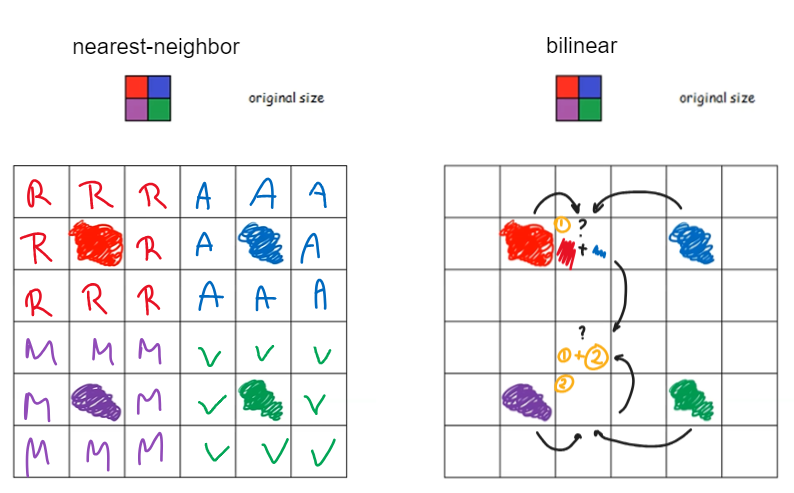

In [ ]:
import scipy.ndimage as ndimage

y = plt.imread("cameraman.tif")

### Applying resize
y_nn = ndimage.zoom(y, 2, order=0)  # Nearest Neighbor
y_bil = ndimage.zoom(y, 2, order=1) # Bilinear
y_bic = ndimage.zoom(y, 2, order=3) # Bicubic

### Showing images
# Original
plt.figure()
plt.imshow(y, cmap='gray')
plt.title('Original')
# Nearest Neighbor
plt.figure()
plt.imshow(y_nn, cmap='gray')
plt.title('Nearest Neighbor')
# Bilinear
plt.figure()
plt.imshow(y_bil, cmap='gray')
plt.title('Bilinear')
# Bicubic
plt.figure()
plt.imshow(y_bic, cmap='gray')
plt.title('Bicubic')

#### **Relación entre pixeles**
- **Vecindario de pixeles:** 
  - N4: 4 a los lados
  - ND: 4 en diagonal
  - N8: 4 lados y 4 diagonales

    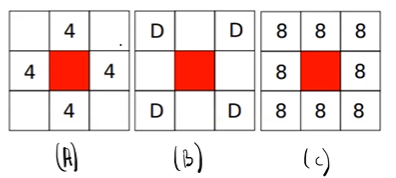

-**Adjacency between pixels:**
  - **4-adjacent**: $p$ and $q$ are $4$-adjacent if their intensities $\in V$ and if $q\in N_4 \left(p\right)$
  - **8-adjacent**: $p$ and $q$ are $8$-adjacent if their intensities $\in V$ and if $q\in N_8 \left(p\right)$
  - **m-adjacent**: $p$ and $q$ are $m$-adjacent if their intensities $\in V$ and the next condition meets:  

    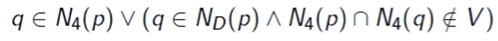

    - N4(p) = que tenga vecinos en N4
    - El resto = q pertenece a la diagonal de p y la intrsección de n4(p) con el n4(q) sea diferente de 1 
    - ej: Sison 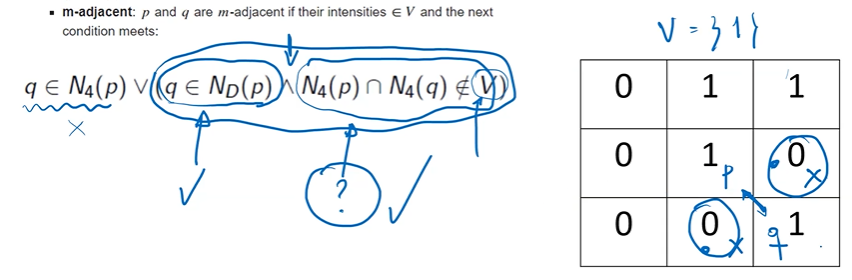 
    - ej: Noson 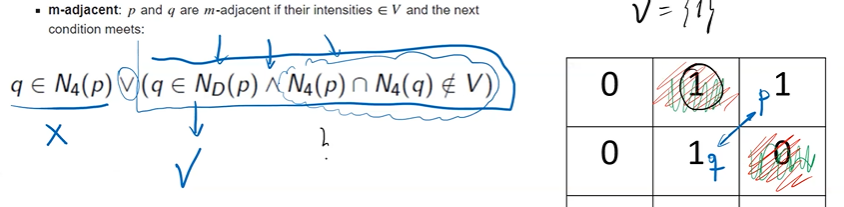
  
-**Conectividad:**
  - 4 conectividad: negro
  - 8 conctividad: Rojo
  - M conctividad: celeste
  
      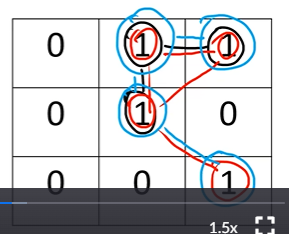
  - Ej: 

     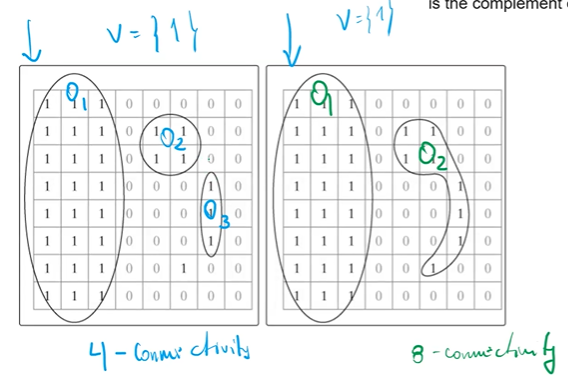
  - **Foreground:** todos los q estan en 1. Unión de las subregiones
  - **Background:** todos los 0. Complemento del foreground
  - **Boundaries:**
    - Inner border: Pixeles del foreground que rodean el objeto
    - Outer border: Pixeles del background que rodean el objeto
  
-**Métricas de distancia:**
      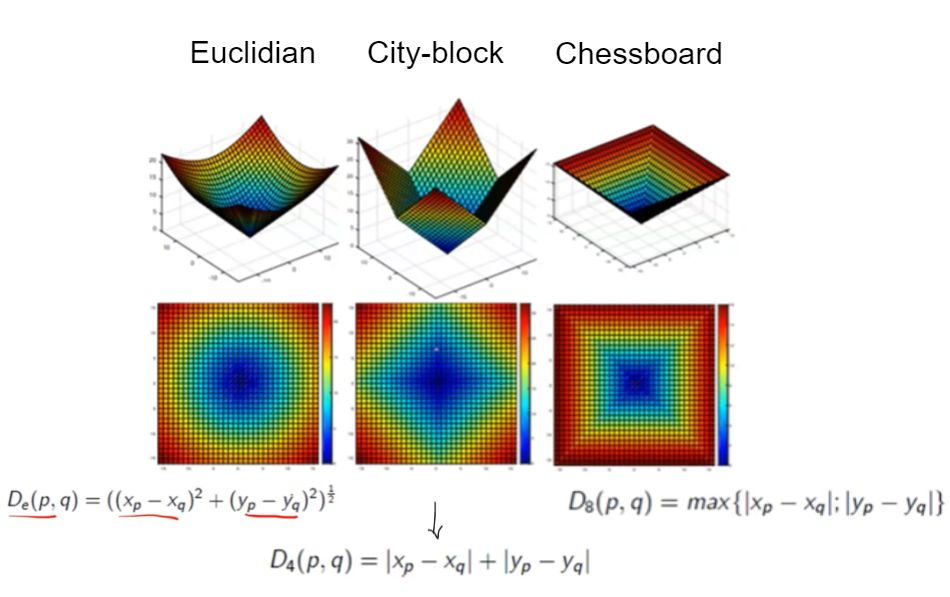

In [ ]:
# Loading the image
y = plt.imread("cameraman.tif")

# Negative
y_negative = 255 - y

# Using a threshold
y_th = y < 50

# Trying to extract an object
from skimage import morphology
y_out = morphology.remove_small_objects(y_th, min_size=300)

# Logarithmic transform
c = 50
y_log = np.round(c * np.log10(1 + y.astype(float) / 255))

# # Gamma transform
gamma = 0.5;
y_adjust = np.uint8((np.double(y) / 255)**gamma * 255);

# Show
plt.figure()

plt.subplot(3, 2, 1)
plt.imshow(y, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('Original')

plt.subplot(3, 2, 2)
plt.imshow(y_negative, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('Negative')

plt.subplot(3, 2, 3)
plt.imshow(y_th, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('Threshold')

plt.subplot(3, 2, 4)
plt.imshow(y_out, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('Extracted Object')

plt.subplot(3, 2, 5)
plt.imshow(y_log, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('Logarithmic Transform')

plt.subplot(3, 2, 6)
plt.imshow(y_adjust, cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('Gamma Transform')

plt.tight_layout()

#### **Transfromaciones de intensidad**
- **Negative images:** Highlight white or gray details on dark regions. El negro se vuelve blanco y el blanco se vuelve negro 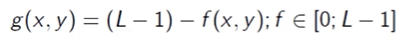 
  - L = Número de niveles --> Si k=8, L=256
- **Logarithmic transformation:** Extiende el rango de low intensities y reduce el rango de high intensities. 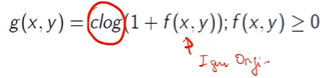
- **Gamma:** Mejora el contraste 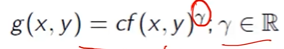 

** El máximo valor de bits es 255 y siempre son enteros

#### **Histograma de una imagen**
- Contar la cantidad de veces que algo ocurre
- No es igual que la función de masa probabilidad, si se normalizara, si sería masa probabilidad
- 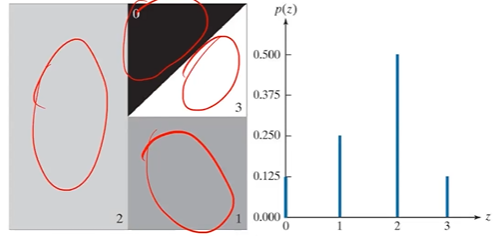